# **Data Import/Wrangling**

In [ ]:
#Import necessary packages
import numpy as np 
import pandas as pd 
from scipy.stats import iqr as sc
import statsmodels.api as sm
pd.set_option('max_columns', 100)

#visualizing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shapely.geometry import Point, Polygon
import plotly.express as px
import seaborn as sns
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

#metrics and split
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#model imports
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample-research.csv') 

#View First
data.head()

Unnamed: 0                             entity_id          inserted_at  \
0           1  fb309acb-d765-4047-bd66-581414c3d409  2022-06-28 16:00:00   
1           2  ee91c73b-273f-47a7-9355-6032c3c9f6da  2022-05-05 17:00:00   
2           3  73bfb530-6b3c-469b-bc11-2d89cc954ad4  2022-06-01 21:00:00   
3           4  c6f6d3de-03a6-4c31-8384-dfafa870638e  2022-05-31 18:00:00   
4           5  3006b10a-605b-44fd-aae9-5055c87b61ae  2022-05-03 14:00:00   

       model manufacturer phone_type  app_vrs_code  android_vrs  android_sdk  \
0   SM-A025U      samsung        GSM           625           11           30   
1  SM-A015T1      samsung        GSM           565           10           29   
2   SM-A025U      samsung        GSM         16972           11           30   
3   SM-S908U      samsung        GSM       2015010           12           31   
4   SM-G998U      samsung        GSM         16921           12           31   

     name                 time  \
0  speeds  2022-06-28 16:00:00   
1  speeds  2022-05-03 19:00:00   
2  speeds  2022-06-01 21:00:00   
3  speeds  2022-05-31 18:00:00   
4  speeds  2022-05-03 13:00:00   

                                      package_name   latitude  longitude  \
0                                              NaN  40.920688 -74.183931   
1                                              NaN  40.706394 -73.533973   
2                                              NaN  40.824369 -73.954624   
3  meteor.test.and.grade.internet.connection.speed  40.397863 -74.223913   
4                                              NaN  40.984231 -73.826052   

   screen_on  lte_rsrp  lte_rsrq  lte_rssnr  network_generation  \
0       True       NaN       NaN        NaN                   4   
1       True       NaN       NaN        NaN                   4   
2       True    -112.0     -13.0        NaN                   4   
3       True    -113.0     -12.0        NaN                   4   
4       True       NaN       NaN        NaN                   2   

   network_type_int network_type  is_network_roaming  network_connection_type  \
0                13          NaN                   0                        0   
1                13          NaN                   0                        0   
2                13          NaN                   0                        0   
3                13          NaN                   0                        0   
4                 2          NaN                   0                        0   

   sp_dl_speed  sp_dl_size  sp_ul_speed  sp_ul_size  sp_ul_time  \
0          0.0         0.0         18.0     11377.0      5018.0   
1          0.0         0.0          0.0         0.0      5055.0   
2      16453.0  10341009.0       6778.0   4287071.0      5060.0   
3      13723.0   8583953.0        505.0    315759.0      5002.0   
4          0.0         0.0          0.0         0.0      4996.0   

  network_country network_name_mapped          device_id_time  
0             USA   Metro by T-Mobile  1230739424112_AQ35Veyb  
1             USA   Metro by T-Mobile  1462406473485_yd5iDemV  
2             USA   Metro by T-Mobile  1462525484209_j7quDK9D  
3             USA                AT&T  1462539609807_rJ35SSDi  
4             USA            T-Mobile  1462548994256_MPHT1kdk

In [ ]:
data.shape

(100000, 31)

In [ ]:
data.describe()

Unnamed: 0  app_vrs_code    android_vrs    android_sdk  \
count  100000.000000  1.000000e+05  100000.000000  100000.000000   
mean    50000.500000  5.841262e+05      11.194160      30.194160   
std     28867.657797  3.548397e+06       0.691308       0.691308   
min         1.000000  3.000000e+00      10.000000      29.000000   
25%     25000.750000  5.650000e+02      11.000000      30.000000   
50%     50000.500000  8.540000e+02      11.000000      30.000000   
75%     75000.250000  1.692100e+04      12.000000      31.000000   
max    100000.000000  3.001530e+07      12.000000      31.000000   

            latitude      longitude      lte_rsrp      lte_rsrq    lte_rssnr  \
count  100000.000000  100000.000000  44920.000000  4.506700e+04  13621.00000   
mean       40.765076     -73.898122    -96.632480  2.382426e+05      1.20718   
std         0.148799       0.336476     13.486205  2.261863e+07     12.61747   
min        40.300032     -74.599460   -140.000000 -2.800000e+01   -130.00000   
25%        40.675816     -74.072388   -107.000000 -1.400000e+01      0.00000   
50%        40.749531     -73.933518    -98.000000 -1.200000e+01      0.00000   
75%        40.843043     -73.828896    -88.000000 -9.000000e+00      0.00000   
max        41.219754     -71.860467    -44.000000  2.147484e+09    300.00000   

       network_generation  network_type_int  is_network_roaming  \
count       100000.000000     100000.000000       100000.000000   
mean             3.985480         12.969320            0.006340   
std              0.134273          0.590646            0.079372   
min              2.000000          1.000000            0.000000   
25%              4.000000         13.000000            0.000000   
50%              4.000000         13.000000            0.000000   
75%              4.000000         13.000000            0.000000   
max              4.000000         15.000000            1.000000   

       network_connection_type   sp_dl_speed    sp_dl_size    sp_ul_speed  \
count            100000.000000   99970.00000  9.997000e+04   99952.000000   
mean                  0.014940   34497.46809  2.175291e+07   13517.262756   
std                   0.129139   52571.06433  3.315200e+07   22637.749991   
min                  -1.000000      -1.00000  0.000000e+00      -1.000000   
25%                   0.000000    1735.00000  1.096977e+06     383.000000   
50%                   0.000000   15970.50000  1.009589e+07    5582.500000   
75%                   0.000000   45766.25000  2.887784e+07   20377.000000   
max                   1.000000  829595.00000  5.187041e+08  789400.000000   

         sp_ul_size    sp_ul_time  
count  9.995200e+04  9.994900e+04  
mean   8.535153e+06  5.516110e+03  
std    1.426233e+07  1.423053e+04  
min    0.000000e+00  1.674000e+03  
25%    2.463800e+05  5.005000e+03  
50%    3.531831e+06  5.011000e+03  
75%    1.284065e+07  5.027000e+03  
max    4.938684e+08  2.504476e+06

In [ ]:
#Duplicates? 
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [ ]:
# Any missing data?
data.isnull().sum()

Unnamed: 0                     0
entity_id                      0
inserted_at                    0
model                       1887
manufacturer                 213
phone_type                     0
app_vrs_code                   0
android_vrs                    0
android_sdk                    0
name                           0
time                           0
package_name               96417
latitude                       0
longitude                      0
screen_on                      0
lte_rsrp                   55080
lte_rsrq                   54933
lte_rssnr                  86379
network_generation             0
network_type_int               0
network_type               98807
is_network_roaming             0
network_connection_type        0
sp_dl_speed                   30
sp_dl_size                    30
sp_ul_speed                   48
sp_ul_size                    48
sp_ul_time                    51
network_country               42
network_name_mapped           42
device_id_

* * A lot of missing/redundant values 

* * some varialbes don't contribute real intel





**Redundant Variables: Not needed for analysis**
  
2.   1st column 
2.   entity_id
1.   time
1.   package_name 
2.   device_id_time
1.   network_type

















In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               100000 non-null  int64  
 1   entity_id                100000 non-null  object 
 2   inserted_at              100000 non-null  object 
 3   model                    98113 non-null   object 
 4   manufacturer             99787 non-null   object 
 5   phone_type               100000 non-null  object 
 6   app_vrs_code             100000 non-null  int64  
 7   android_vrs              100000 non-null  int64  
 8   android_sdk              100000 non-null  int64  
 9   name                     100000 non-null  object 
 10  time                     100000 non-null  object 
 11  package_name             3583 non-null    object 
 12  latitude                 100000 non-null  float64
 13  longitude                100000 non-null  float64
 14  scree

some data types could be changed to int or convert to float 32 to take up less space/memory/runtime but float64 is more accurate and precise

In [ ]:
#for column in data.columns:
    #if data[column].dtype == 'float64':
        #data[column] = data[column].astype(np.float32)

In [ ]:
#for column in data.columns:
    #if data[column].dtype == 'int64':
        #data[column] = data[column].astype(np.int32)

In [ ]:
#data.info()

In [ ]:
# transform the column TotalCharges into a numeric data type
#df = pd.to_numeric(df["sp_ul_time"])
#df

In [ ]:
# store as data frame
df= pd.DataFrame(data)
df

Unnamed: 0                             entity_id          inserted_at  \
0               1  fb309acb-d765-4047-bd66-581414c3d409  2022-06-28 16:00:00   
1               2  ee91c73b-273f-47a7-9355-6032c3c9f6da  2022-05-05 17:00:00   
2               3  73bfb530-6b3c-469b-bc11-2d89cc954ad4  2022-06-01 21:00:00   
3               4  c6f6d3de-03a6-4c31-8384-dfafa870638e  2022-05-31 18:00:00   
4               5  3006b10a-605b-44fd-aae9-5055c87b61ae  2022-05-03 14:00:00   
...           ...                                   ...                  ...   
99995       99996  87bdbc20-28a5-4476-b9fb-fc7acc1fef46  2022-06-23 14:00:00   
99996       99997  f92dab47-a4cf-4954-89b3-346e9ddffd26  2022-06-13 15:00:00   
99997       99998  c79423a7-2b1a-4aad-94fd-8b08bc7502e0  2022-06-05 14:00:00   
99998       99999  a6e2549c-b222-4c0d-be18-0b0a1f8ca25d  2022-04-19 05:00:00   
99999      100000  8497e8e1-2018-4b12-8b63-56c5df131b30  2022-04-19 03:00:00   

             model manufacturer phone_type  app_vrs_code  android_vrs  \
0         SM-A025U      samsung        GSM           625           11   
1        SM-A015T1      samsung        GSM           565           10   
2         SM-A025U      samsung        GSM         16972           11   
3         SM-S908U      samsung        GSM       2015010           12   
4         SM-G998U      samsung        GSM         16921           12   
...            ...          ...        ...           ...          ...   
99995  moto g pure     motorola        GSM         17000           11   
99996     SM-A125U      samsung        GSM           636           11   
99997     SM-N975U      samsung        GSM           565           12   
99998     SM-N986U      samsung       CDMA         16921           12   
99999     SM-G981U      samsung        GSM          2483           12   

       android_sdk    name                 time  \
0               30  speeds  2022-06-28 16:00:00   
1               29  speeds  2022-05-03 19:00:00   
2               30  speeds  2022-06-01 21:00:00   
3               31  speeds  2022-05-31 18:00:00   
4               31  speeds  2022-05-03 13:00:00   
...            ...     ...                  ...   
99995           30  speeds  2022-06-23 14:00:00   
99996           30  speeds  2022-06-13 15:00:00   
99997           31  speeds  2022-06-05 14:00:00   
99998           31  speeds  2022-04-18 18:00:00   
99999           31  speeds  2022-04-19 03:00:00   

                                          package_name   latitude  longitude  \
0                                                  NaN  40.920688 -74.183931   
1                                                  NaN  40.706394 -73.533973   
2                                                  NaN  40.824369 -73.954624   
3      meteor.test.and.grade.internet.connection.speed  40.397863 -74.223913   
4                                                  NaN  40.984231 -73.826052   
...                                                ...        ...        ...   
99995                                              NaN  40.757004 -74.214415   
99996                                              NaN  40.771373 -73.199787   
99997                                              NaN  40.688529 -73.751911   
99998                                              NaN  40.814425 -73.266411   
99999                                              NaN  40.665503 -73.499557   

       screen_on  lte_rsrp  lte_rsrq  lte_rssnr  network_generation  \
0           True       NaN       NaN        NaN                   4   
1           True       NaN       NaN        NaN                   4   
2           True    -112.0     -13.0        NaN                   4   
3           True    -113.0     -12.0        NaN                   4   
4           True       NaN       NaN        NaN                   2   
...          ...       ...       ...        ...                 ...   
99995       True       NaN       NaN        NaN                   4   
99996       True     -56.0 

In [ ]:
#clean data

#remove first column 
data = data.iloc[: , 1:]

#dropping redundant variables
d =data.drop(columns=['entity_id', 'time', 'package_name', 'device_id_time','network_type'])
d

inserted_at        model manufacturer phone_type  app_vrs_code  \
0      2022-06-28 16:00:00     SM-A025U      samsung        GSM           625   
1      2022-05-05 17:00:00    SM-A015T1      samsung        GSM           565   
2      2022-06-01 21:00:00     SM-A025U      samsung        GSM         16972   
3      2022-05-31 18:00:00     SM-S908U      samsung        GSM       2015010   
4      2022-05-03 14:00:00     SM-G998U      samsung        GSM         16921   
...                    ...          ...          ...        ...           ...   
99995  2022-06-23 14:00:00  moto g pure     motorola        GSM         17000   
99996  2022-06-13 15:00:00     SM-A125U      samsung        GSM           636   
99997  2022-06-05 14:00:00     SM-N975U      samsung        GSM           565   
99998  2022-04-19 05:00:00     SM-N986U      samsung       CDMA         16921   
99999  2022-04-19 03:00:00     SM-G981U      samsung        GSM          2483   

       android_vrs  android_sdk    name   latitude  longitude  screen_on  \
0               11           30  speeds  40.920688 -74.183931       True   
1               10           29  speeds  40.706394 -73.533973       True   
2               11           30  speeds  40.824369 -73.954624       True   
3               12           31  speeds  40.397863 -74.223913       True   
4               12           31  speeds  40.984231 -73.826052       True   
...            ...          ...     ...        ...        ...        ...   
99995           11           30  speeds  40.757004 -74.214415       True   
99996           11           30  speeds  40.771373 -73.199787       True   
99997           12           31  speeds  40.688529 -73.751911       True   
99998           12           31  speeds  40.814425 -73.266411       True   
99999           12           31  speeds  40.665503 -73.499557       True   

       lte_rsrp  lte_rsrq  lte_rssnr  network_generation  network_type_int  \
0           NaN       NaN        NaN                   4                13   
1           NaN       NaN        NaN                   4                13   
2        -112.0     -13.0        NaN                   4                13   
3        -113.0     -12.0        NaN                   4                13   
4           NaN       NaN        NaN                   2                 2   
...         ...       ...        ...                 ...               ...   
99995       NaN       NaN        NaN                   4                13   
99996     -56.0      -7.0        0.0                   4                13   
99997       NaN       NaN        NaN                   4                13   
99998       NaN       NaN        NaN                   4                13   
99999       NaN       NaN        NaN                   4                13   

       is_network_roaming  network_connection_type  sp_dl_speed   sp_dl_size  \
0                       0                        0          0.0          0.0   
1                       0                        0          0.0          0.0   
2                       0                        0      16453.0   10341009.0   
3                       0                        0      13723.0    8583953.0   
4                       0                        0          0.0          0.0   
...                   ...                      ...          ...          ...   
99995                   0                        0      52474.0   33157304.0   
99996                   0                        0     243018.0  154376891.0   
99997                   0                        0          0.0          0.0   
99998                   0                        0       4610.0    2882801.0   
99999                   0                        0          0.0          0.0   

       sp_ul_speed  sp_ul_size  sp_ul_time network_country network_name_mapped  
0             18.0     11377.0      5018.0             USA   Metro by T-Mobile  
1              0.0         0.0      5055.0             USA   Metro by

In [ ]:
# Any missing data?
d.isnull().sum()

inserted_at                    0
model                       1887
manufacturer                 213
phone_type                     0
app_vrs_code                   0
android_vrs                    0
android_sdk                    0
name                           0
latitude                       0
longitude                      0
screen_on                      0
lte_rsrp                   55080
lte_rsrq                   54933
lte_rssnr                  86379
network_generation             0
network_type_int               0
is_network_roaming             0
network_connection_type        0
sp_dl_speed                   30
sp_dl_size                    30
sp_ul_speed                   48
sp_ul_size                    48
sp_ul_time                    51
network_country               42
network_name_mapped           42
dtype: int64

**K-Nearest Neighbor (KNN) Method:**

Replace missing numerical values with the average of the specific column to remove bias created by completely removing. Including the average instead of NAN is better for data mining and replacing missing values with 0 will drag down your average thus creating bias

In [ ]:
d= d.fillna(d.mean())
d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


inserted_at        model manufacturer phone_type  app_vrs_code  \
0      2022-06-28 16:00:00     SM-A025U      samsung        GSM           625   
1      2022-05-05 17:00:00    SM-A015T1      samsung        GSM           565   
2      2022-06-01 21:00:00     SM-A025U      samsung        GSM         16972   
3      2022-05-31 18:00:00     SM-S908U      samsung        GSM       2015010   
4      2022-05-03 14:00:00     SM-G998U      samsung        GSM         16921   
...                    ...          ...          ...        ...           ...   
99995  2022-06-23 14:00:00  moto g pure     motorola        GSM         17000   
99996  2022-06-13 15:00:00     SM-A125U      samsung        GSM           636   
99997  2022-06-05 14:00:00     SM-N975U      samsung        GSM           565   
99998  2022-04-19 05:00:00     SM-N986U      samsung       CDMA         16921   
99999  2022-04-19 03:00:00     SM-G981U      samsung        GSM          2483   

       android_vrs  android_sdk    name   latitude  longitude  screen_on  \
0               11           30  speeds  40.920688 -74.183931       True   
1               10           29  speeds  40.706394 -73.533973       True   
2               11           30  speeds  40.824369 -73.954624       True   
3               12           31  speeds  40.397863 -74.223913       True   
4               12           31  speeds  40.984231 -73.826052       True   
...            ...          ...     ...        ...        ...        ...   
99995           11           30  speeds  40.757004 -74.214415       True   
99996           11           30  speeds  40.771373 -73.199787       True   
99997           12           31  speeds  40.688529 -73.751911       True   
99998           12           31  speeds  40.814425 -73.266411       True   
99999           12           31  speeds  40.665503 -73.499557       True   

        lte_rsrp       lte_rsrq  lte_rssnr  network_generation  \
0      -96.63248  238242.620188    1.20718                   4   
1      -96.63248  238242.620188    1.20718                   4   
2     -112.00000     -13.000000    1.20718                   4   
3     -113.00000     -12.000000    1.20718                   4   
4      -96.63248  238242.620188    1.20718                   2   
...          ...            ...        ...                 ...   
99995  -96.63248  238242.620188    1.20718                   4   
99996  -56.00000      -7.000000    0.00000                   4   
99997  -96.63248  238242.620188    1.20718                   4   
99998  -96.63248  238242.620188    1.20718                   4   
99999  -96.63248  238242.620188    1.20718                   4   

       network_type_int  is_network_roaming  network_connection_type  \
0                    13                   0                        0   
1                    13                   0                        0   
2                    13                   0                        0   
3                    13                   0                        0   
4                     2                   0                        0   
...                 ...                 ...                      ...   
99995                13                   0                        0   
99996                13                   0                        0   
99997                13                   0                        0   
99998                13                   0                        0   
99999                13                   0                        0   

       sp_dl_speed   sp_dl_size  sp_ul_speed  sp_ul_size  sp_ul_time  \
0              0.0          0.0         18.0     11377.0      5018.0   
1              0.0          0.0          0.0         0.0      5055.0   
2          16453.0   10341009.0       6778.0   4287071.0      5060.0   
3          13723.0    8583953.0        505.0    315759.0      5002.0   
4              0.0          0.0          0.0         0.0      4996.0   
...            ...          ...        

In [ ]:
# Any missing data?
d.isnull().sum()

inserted_at                   0
model                      1887
manufacturer                213
phone_type                    0
app_vrs_code                  0
android_vrs                   0
android_sdk                   0
name                          0
latitude                      0
longitude                     0
screen_on                     0
lte_rsrp                      0
lte_rsrq                      0
lte_rssnr                     0
network_generation            0
network_type_int              0
is_network_roaming            0
network_connection_type       0
sp_dl_speed                   0
sp_dl_size                    0
sp_ul_speed                   0
sp_ul_size                    0
sp_ul_time                    0
network_country              42
network_name_mapped          42
dtype: int64

**remove missing manufactuer and model data points **


In [ ]:
#drop remaining N/A
d.dropna(inplace = True)
d

inserted_at        model manufacturer phone_type  app_vrs_code  \
0      2022-06-28 16:00:00     SM-A025U      samsung        GSM           625   
1      2022-05-05 17:00:00    SM-A015T1      samsung        GSM           565   
2      2022-06-01 21:00:00     SM-A025U      samsung        GSM         16972   
3      2022-05-31 18:00:00     SM-S908U      samsung        GSM       2015010   
4      2022-05-03 14:00:00     SM-G998U      samsung        GSM         16921   
...                    ...          ...          ...        ...           ...   
99995  2022-06-23 14:00:00  moto g pure     motorola        GSM         17000   
99996  2022-06-13 15:00:00     SM-A125U      samsung        GSM           636   
99997  2022-06-05 14:00:00     SM-N975U      samsung        GSM           565   
99998  2022-04-19 05:00:00     SM-N986U      samsung       CDMA         16921   
99999  2022-04-19 03:00:00     SM-G981U      samsung        GSM          2483   

       android_vrs  android_sdk    name   latitude  longitude  screen_on  \
0               11           30  speeds  40.920688 -74.183931       True   
1               10           29  speeds  40.706394 -73.533973       True   
2               11           30  speeds  40.824369 -73.954624       True   
3               12           31  speeds  40.397863 -74.223913       True   
4               12           31  speeds  40.984231 -73.826052       True   
...            ...          ...     ...        ...        ...        ...   
99995           11           30  speeds  40.757004 -74.214415       True   
99996           11           30  speeds  40.771373 -73.199787       True   
99997           12           31  speeds  40.688529 -73.751911       True   
99998           12           31  speeds  40.814425 -73.266411       True   
99999           12           31  speeds  40.665503 -73.499557       True   

        lte_rsrp       lte_rsrq  lte_rssnr  network_generation  \
0      -96.63248  238242.620188    1.20718                   4   
1      -96.63248  238242.620188    1.20718                   4   
2     -112.00000     -13.000000    1.20718                   4   
3     -113.00000     -12.000000    1.20718                   4   
4      -96.63248  238242.620188    1.20718                   2   
...          ...            ...        ...                 ...   
99995  -96.63248  238242.620188    1.20718                   4   
99996  -56.00000      -7.000000    0.00000                   4   
99997  -96.63248  238242.620188    1.20718                   4   
99998  -96.63248  238242.620188    1.20718                   4   
99999  -96.63248  238242.620188    1.20718                   4   

       network_type_int  is_network_roaming  network_connection_type  \
0                    13                   0                        0   
1                    13                   0                        0   
2                    13                   0                        0   
3                    13                   0                        0   
4                     2                   0                        0   
...                 ...                 ...                      ...   
99995                13                   0                        0   
99996                13                   0                        0   
99997                13                   0                        0   
99998                13                   0                        0   
99999                13                   0                        0   

       sp_dl_speed   sp_dl_size  sp_ul_speed  sp_ul_size  sp_ul_time  \
0              0.0          0.0         18.0     11377.0      5018.0   
1              0.0          0.0          0.0         0.0      5055.0   
2          16453.0   10341009.0       6778.0   4287071.0      5060.0   
3          13723.0    8583953.0        505.0    315759.0      5002.0   
4              0.0          0.0          0.0         0.0      4996.0   
...            ...          ...        

In [ ]:
# Any missing data?
d.isnull().sum()

inserted_at                0
model                      0
manufacturer               0
phone_type                 0
app_vrs_code               0
android_vrs                0
android_sdk                0
name                       0
latitude                   0
longitude                  0
screen_on                  0
lte_rsrp                   0
lte_rsrq                   0
lte_rssnr                  0
network_generation         0
network_type_int           0
is_network_roaming         0
network_connection_type    0
sp_dl_speed                0
sp_dl_size                 0
sp_ul_speed                0
sp_ul_size                 0
sp_ul_time                 0
network_country            0
network_name_mapped        0
dtype: int64

In [ ]:
d.describe()

app_vrs_code   android_vrs   android_sdk      latitude     longitude  \
count  9.807100e+04  98071.000000  98071.000000  98071.000000  98071.000000   
mean   5.645072e+05     11.194726     30.194726     40.765075    -73.897012   
std    3.493227e+06      0.692781      0.692781      0.148916      0.337434   
min    3.000000e+00     10.000000     29.000000     40.300032    -74.599460   
25%    5.650000e+02     11.000000     30.000000     40.675725    -74.071638   
50%    8.430000e+02     11.000000     30.000000     40.749539    -73.932505   
75%    1.692100e+04     12.000000     31.000000     40.843182    -73.827804   
max    3.001530e+07     12.000000     31.000000     41.219676    -71.860467   

           lte_rsrp      lte_rsrq     lte_rssnr  network_generation  \
count  98071.000000  9.807100e+04  98071.000000        98071.000000   
mean     -96.634572  2.400720e+05      1.181006            3.986398   
std        9.054665  1.533283e+07      4.156752            0.129704   
min     -140.000000 -2.800000e+01   -130.000000            2.000000   
25%      -96.632480 -1.100000e+01      1.207180            4.000000   
50%      -96.632480  2.382426e+05      1.207180            4.000000   
75%      -96.632480  2.382426e+05      1.207180            4.000000   
max      -44.000000  2.147484e+09    300.000000            4.000000   

       network_type_int  is_network_roaming  network_connection_type  \
count      98071.000000        98071.000000             98071.000000   
mean          12.971235            0.005312                 0.014143   
std            0.568808            0.072693                 0.125774   
min            1.000000            0.000000                -1.000000   
25%           13.000000            0.000000                 0.000000   
50%           13.000000            0.000000                 0.000000   
75%           13.000000            0.000000                 0.000000   
max           15.000000            1.000000                 1.000000   

         sp_dl_speed    sp_dl_size    sp_ul_speed    sp_ul_size    sp_ul_time  
count   98071.000000  9.807100e+04   98071.000000  9.807100e+04  9.807100e+04  
mean    34538.052759  2.177451e+07   13455.276260  8.492273e+06  5.506375e+03  
std     52411.010381  3.305488e+07   22111.090968  1.393036e+07  1.403042e+04  
min        -1.000000  0.000000e+00      -1.000000  0.000000e+00  1.674000e+03  
25%      1731.000000  1.094252e+06     377.000000  2.417260e+05  5.005000e+03  
50%     16035.000000  1.013868e+07    5564.000000  3.521482e+06  5.010000e+03  
75%     45888.500000  2.893090e+07   20314.500000  1.279366e+07  5.027000e+03  
max    829595.000000  5.187041e+08  687334.000000  4.297559e+08  2.504476e+06

In [ ]:
#New column with month 
month = list()
for i in d["inserted_at"]:
    month.append(int(str(i)[5:7]))
d["month"] = month
d.head()

inserted_at      model manufacturer phone_type  app_vrs_code  \
0  2022-06-28 16:00:00   SM-A025U      samsung        GSM           625   
1  2022-05-05 17:00:00  SM-A015T1      samsung        GSM           565   
2  2022-06-01 21:00:00   SM-A025U      samsung        GSM         16972   
3  2022-05-31 18:00:00   SM-S908U      samsung        GSM       2015010   
4  2022-05-03 14:00:00   SM-G998U      samsung        GSM         16921   

   android_vrs  android_sdk    name   latitude  longitude  screen_on  \
0           11           30  speeds  40.920688 -74.183931       True   
1           10           29  speeds  40.706394 -73.533973       True   
2           11           30  speeds  40.824369 -73.954624       True   
3           12           31  speeds  40.397863 -74.223913       True   
4           12           31  speeds  40.984231 -73.826052       True   

    lte_rsrp       lte_rsrq  lte_rssnr  network_generation  network_type_int  \
0  -96.63248  238242.620188    1.20718                   4                13   
1  -96.63248  238242.620188    1.20718                   4                13   
2 -112.00000     -13.000000    1.20718                   4                13   
3 -113.00000     -12.000000    1.20718                   4                13   
4  -96.63248  238242.620188    1.20718                   2                 2   

   is_network_roaming  network_connection_type  sp_dl_speed  sp_dl_size  \
0                   0                        0          0.0         0.0   
1                   0                        0          0.0         0.0   
2                   0                        0      16453.0  10341009.0   
3                   0                        0      13723.0   8583953.0   
4                   0                        0          0.0         0.0   

   sp_ul_speed  sp_ul_size  sp_ul_time network_country network_name_mapped  \
0         18.0     11377.0      5018.0             USA   Metro by T-Mobile   
1          0.0         0.0      5055.0             USA   Metro by T-Mobile   
2       6778.0   4287071.0      5060.0             USA   Metro by T-Mobile   
3        505.0    315759.0      5002.0             USA                AT&T   
4          0.0         0.0      4996.0             USA            T-Mobile   

   month  
0      6  
1      5  
2      6  
3      5  
4      5

In [ ]:
# double check the resulting data
d.agg(['mean','std','skew'])

app_vrs_code  android_vrs  android_sdk   latitude  longitude  screen_on  \
mean  5.645072e+05    11.194726    30.194726  40.765075 -73.897012   0.991210   
std   3.493227e+06     0.692781     0.692781   0.148916   0.337434   0.093340   
skew  7.708100e+00    -0.279797    -0.279797   0.438506   1.392181 -10.525384   

       lte_rsrp      lte_rsrq  lte_rssnr  network_generation  \
mean -96.634572  2.400720e+05   1.181006            3.986398   
std    9.054665  1.533283e+07   4.156752            0.129704   
skew   0.529976  1.400296e+02  34.512390          -10.600671   

      network_type_int  is_network_roaming  network_connection_type  \
mean         12.971235            0.005312                 0.014143   
std           0.568808            0.072693                 0.125774   
skew        -14.882922           13.610551                 6.769676   

       sp_dl_speed    sp_dl_size   sp_ul_speed    sp_ul_size    sp_ul_time  \
mean  34538.052759  2.177451e+07  13455.276260  8.492273e+06   5506.374824   
std   52411.010381  3.305488e+07  22111.090968  1.393036e+07  14030.424809   
skew      3.686308  3.682250e+00      7.758358  7.653006e+00    104.208489   

         month  
mean  5.049148  
std   0.805553  
skew -0.076718

# **Explaratory Data Analysis/Visualizing**

In [ ]:
# total distinct model in dataset
d.groupby('model').count()

inserted_at  manufacturer  phone_type  \
model                                                               
5062Z                               528           528         528   
5087Z                               320           320         320   
CP3669AS                            177           177         177   
CP3706AS                            224           224         224   
EC211001                             90            90          90   
...                                 ...           ...         ...   
moto g play (2021)                 3665          3665        3665   
moto g pure                       11934         11934       11934   
moto g stylus 5G                   2188          2188        2188   
motorola edge 5G UW (2021)          499           499         499   
motorola one 5G ace                 859           859         859   

                            app_vrs_code  android_vrs  android_sdk   name  \
model                                                                       
5062Z                                528          528          528    528   
5087Z                                320          320          320    320   
CP3669AS                             177          177          177    177   
CP3706AS                             224          224          224    224   
EC211001                              90           90           90     90   
...                                  ...          ...          ...    ...   
moto g play (2021)                  3665         3665         3665   3665   
moto g pure                        11934        11934        11934  11934   
moto g stylus 5G                    2188         2188         2188   2188   
motorola edge 5G UW (2021)           499          499          499    499   
motorola one 5G ace                  859          859          859    859   

                            latitude  longitude  screen_on  lte_rsrp  \
model                                                                  
5062Z                            528        528        528       528   
5087Z                            320        320        320       320   
CP3669AS                         177        177        177       177   
CP3706AS                         224        224        224       224   
EC211001                          90         90         90        90   
...                              ...        ...        ...       ...   
moto g play (2021)              3665       3665       3665      3665   
moto g pure                    11934      11934      11934     11934   
moto g stylus 5G                2188       2188       2188      2188   
motorola edge 5G UW (2021)       499        499        499       499   
motorola one 5G ace              859        859        859       859   

                            lte_rsrq  lte_rssnr  network_generation  \
model                                                                 
5062Z                            528        528                 528   
5087Z                            320        320                 320   
CP3669AS                         177        177                 177   
CP3706AS                         224        224                 224   
EC211001                          90         90                  90   
...                              ...        ...                 ...   
moto g play (2021)              3665       3665                3665   
moto g pure                    11934      11934               11934   
moto g stylus 5G                2188       2188                2188   
motorola edge 5G UW (2021)       499        499                 499   
motorola one 5G ace              859        859                 859   

                            network_type_int  is_network_roaming  \
model                                                              
5062Z                                    528                 528   
5087Z                                    320                 32

In [ ]:
# total distinct manufacturer in dataset
d.groupby('manufacturer').count()

inserted_at  model  phone_type  app_vrs_code  android_vrs  \
manufacturer                                                              
Coolpad               177    177         177           177          177   
FIH                    90     90          90            90           90   
Google               1191   1191        1191          1191         1191   
HMD Global            346    346         346           346          346   
LGE                 10509  10509       10509         10509        10509   
OnePlus               252    252         252           252          252   
TCL                   889    889         889           889          889   
TINNO                 686    686         686           686          686   
Wingtech              504    504         504           504          504   
Yulong                224    224         224           224          224   
along                 294    294         294           294          294   
motorola            19145  19145       19145         19145        19145   
samsung             63764  63764       63764         63764        63764   

              android_sdk   name  latitude  longitude  screen_on  lte_rsrp  \
manufacturer                                                                 
Coolpad               177    177       177        177        177       177   
FIH                    90     90        90         90         90        90   
Google               1191   1191      1191       1191       1191      1191   
HMD Global            346    346       346        346        346       346   
LGE                 10509  10509     10509      10509      10509     10509   
OnePlus               252    252       252        252        252       252   
TCL                   889    889       889        889        889       889   
TINNO                 686    686       686        686        686       686   
Wingtech              504    504       504        504        504       504   
Yulong                224    224       224        224        224       224   
along                 294    294       294        294        294       294   
motorola            19145  19145     19145      19145      19145     19145   
samsung             63764  63764     63764      63764      63764     63764   

              lte_rsrq  lte_rssnr  network_generation  network_type_int  \
manufacturer                                                              
Coolpad            177        177                 177               177   
FIH                 90         90                  90                90   
Google            1191       1191                1191              1191   
HMD Global         346        346                 346               346   
LGE              10509      10509               10509             10509   
OnePlus            252        252                 252               252   
TCL                889        889                 889               889   
TINNO              686        686                 686               686   
Wingtech           504        504                 504               504   
Yulong             224        224                 224               224   
along              294        294                 294               294   
motorola         19145      19145               19145             19145   
samsung          63764      63764               63764             63764   

              is_network_roaming  network_connection_type  sp_dl_speed  \
manufacturer                                                             
Coolpad                      177                      177          177   
FIH                           90                       90           90   
Google                      1191                     1191         1191   
HMD Global                   346                      346          346   
LGE                        10509                    10509        10509   
OnePlus                      252                      252          252   

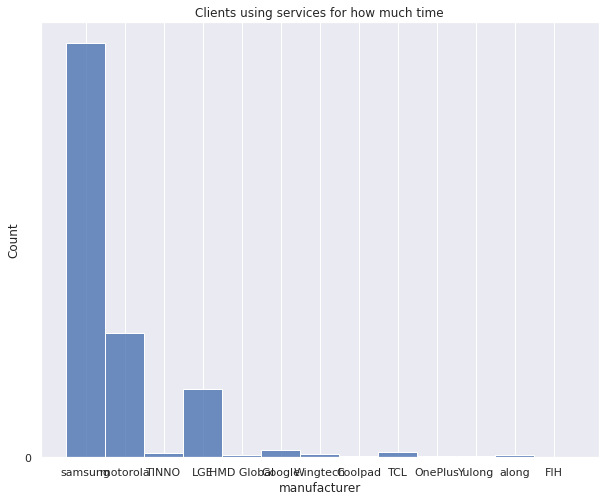

In [ ]:
ma = d['manufacturer']
plt.figure(figsize=(10,8))
sns.histplot(ma, bins=5000, alpha=0.8)
plt.yticks(list(range(0,50,5000)))
plt.title('Clients using services for how much time')
plt.show()

In [ ]:
d.head(2)

inserted_at      model manufacturer phone_type  app_vrs_code  \
0  2022-06-28 16:00:00   SM-A025U      samsung        GSM           625   
1  2022-05-05 17:00:00  SM-A015T1      samsung        GSM           565   

   android_vrs  android_sdk    name   latitude  longitude  screen_on  \
0           11           30  speeds  40.920688 -74.183931       True   
1           10           29  speeds  40.706394 -73.533973       True   

   lte_rsrp       lte_rsrq  lte_rssnr  network_generation  network_type_int  \
0 -96.63248  238242.620188    1.20718                   4                13   
1 -96.63248  238242.620188    1.20718                   4                13   

   is_network_roaming  network_connection_type  sp_dl_speed  sp_dl_size  \
0                   0                        0          0.0         0.0   
1                   0                        0          0.0         0.0   

   sp_ul_speed  sp_ul_size  sp_ul_time network_country network_name_mapped  \
0         18.0     11377.0      5018.0             USA   Metro by T-Mobile   
1          0.0         0.0      5055.0             USA   Metro by T-Mobile   

   month  
0      6  
1      5

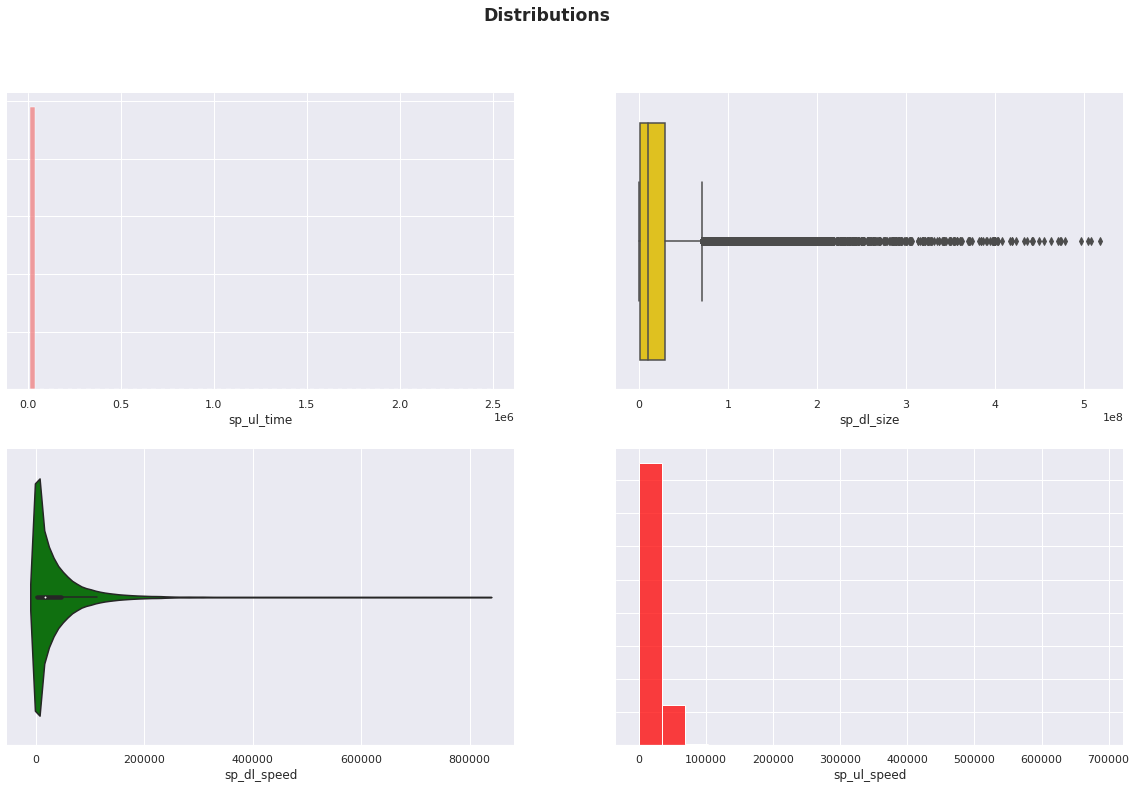

In [ ]:
#Plot distribution of certain variables
fig=plt.figure(figsize=(20,12),facecolor='white')

plt.suptitle('Distributions',weight='bold',fontsize='xx-large')

gs=fig.add_gridspec(2,2)

ax=[_ for i in range(4)]

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])
ax[2]=fig.add_subplot(gs[1,0])
ax[3]=fig.add_subplot(gs[1,1])


sns.histplot(x="sp_ul_time",data=d,ax=ax[0],shrink=0.5,bins=50,color="lightcoral")
sns.histplot(x="sp_ul_speed",data=d,ax=ax[3],bins=20,color='red')
sns.boxplot(x='sp_dl_size',data=d,ax=ax[1],color='gold')
sns.violinplot(x="sp_dl_speed",data=d,ax=ax[2],color="green")

for i in range(4):
    
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params('y',length=0)
    
    for direction in ['top','left','right']:
        
        ax[i].spines[direction].set_visible(False)

In [ ]:
#3-D plot
fig = px.scatter_3d(d, x='network_generation', y='sp_ul_size', z='sp_ul_time',
              color='model')
fig.show()

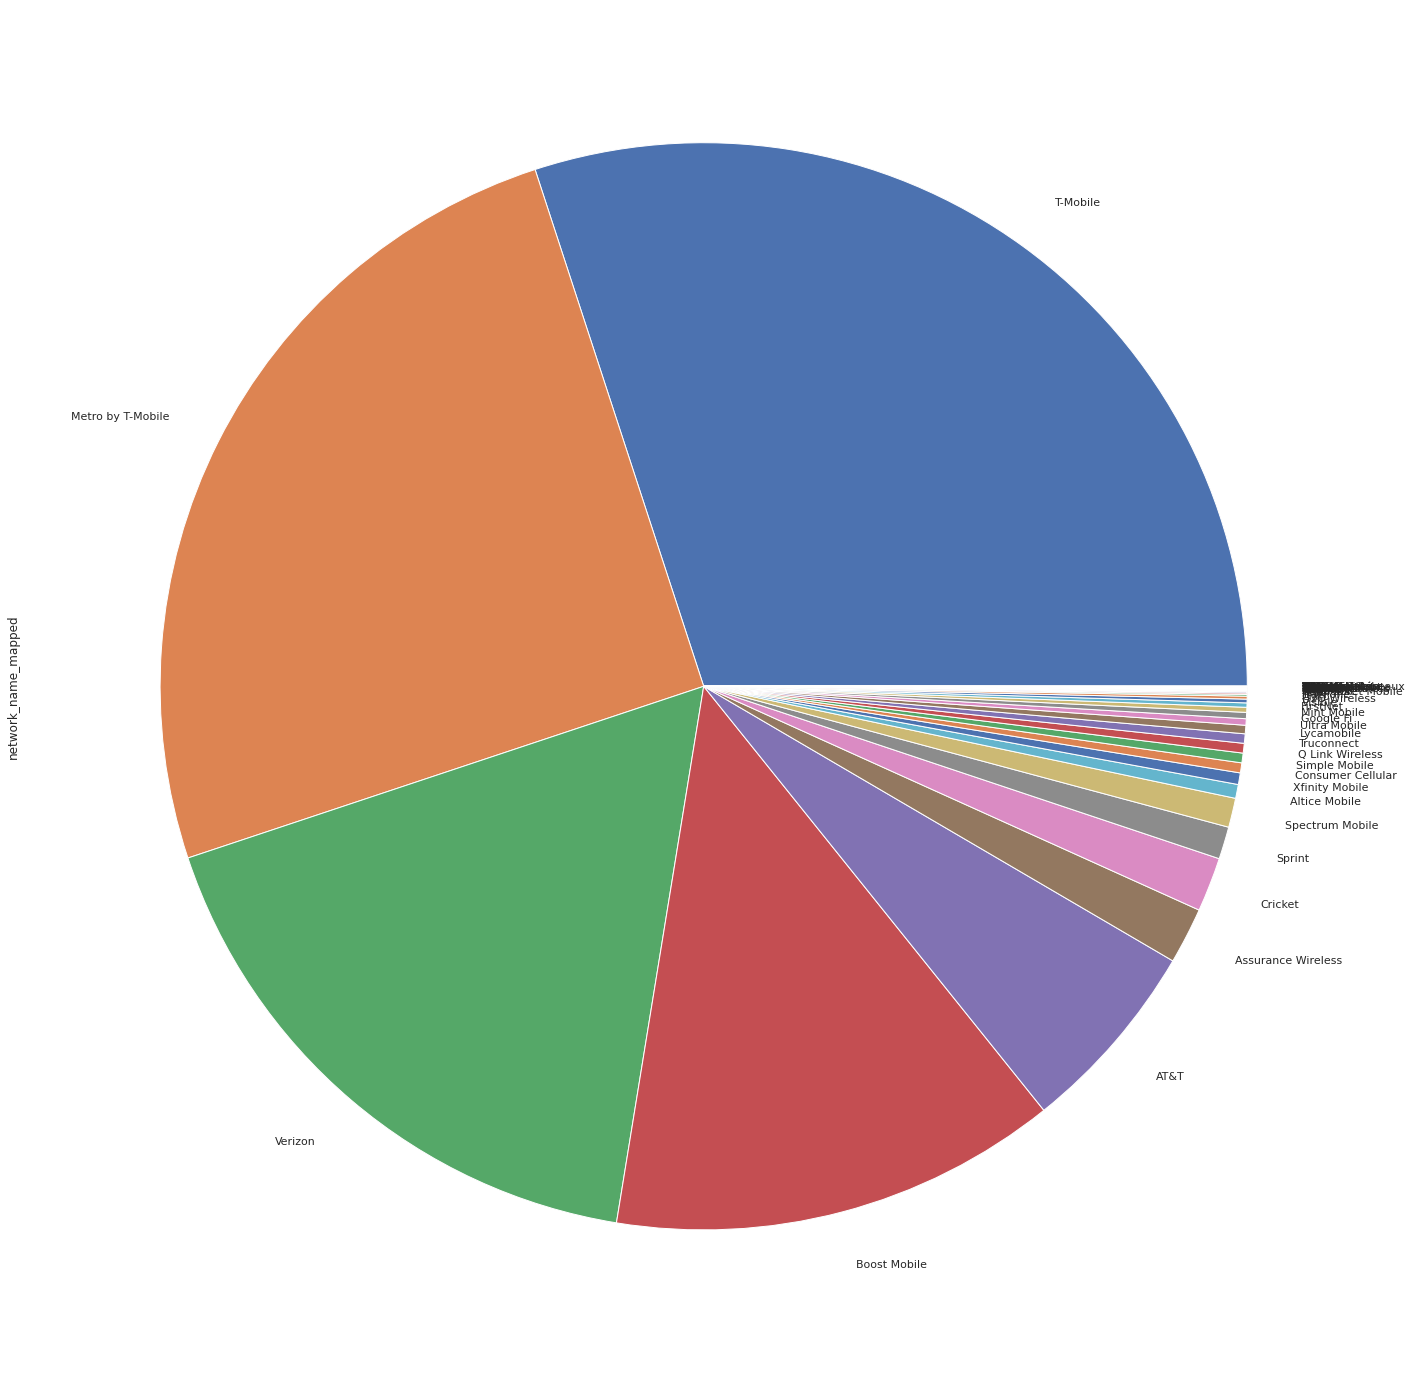

In [ ]:
#most networks?
d['network_name_mapped'].value_counts().plot(kind='pie', figsize=(25,25))

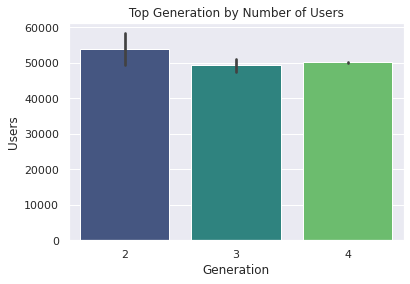

In [ ]:
# Network Generation with most users
sns.set_style('darkgrid')
ch=d['network_generation']
sns.barplot(x=ch,y=ch.index,palette='viridis')
plt.xlabel('Generation')
plt.ylabel('Users')
plt.title(" Top Generation by Number of Users ")
plt.show()

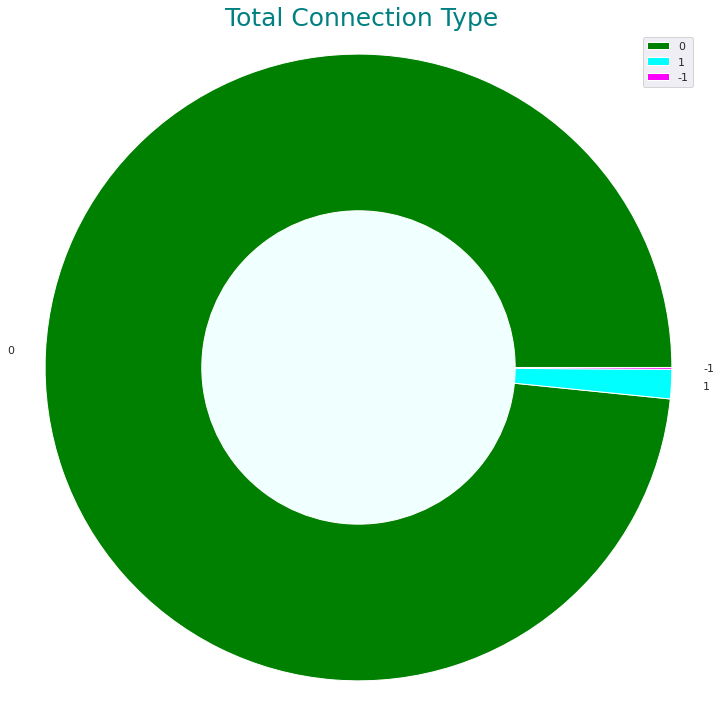

In [ ]:
#Count by Connection Type
d.dropna(inplace = True)
labels = d.network_connection_type.value_counts().index
colors = ['green','cyan','magenta']
sizes = d.network_connection_type.value_counts().values
explode=np.zeros((len(d.network_connection_type.unique()),), dtype=int)
# visual
plt.figure(figsize = (10,10))
plt.title(' Total Connection Type',color = 'teal',fontsize = 25)
patches, texts = plt.pie(sizes,explode=explode, labels=labels, colors=colors)
centre_circle = plt.Circle((0, 0), 0.50, fc='azure')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



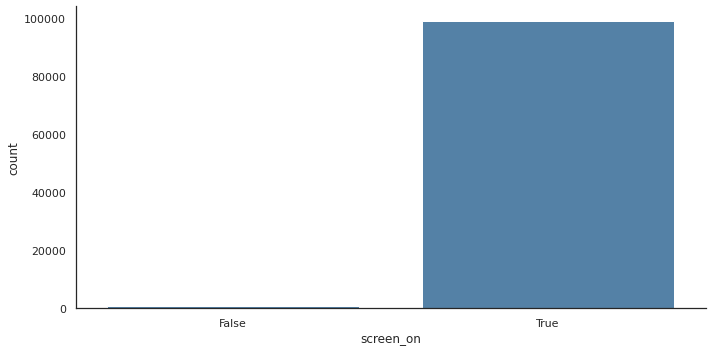

In [ ]:
#screen on vs off? 
with sns.axes_style('white'):
  g = sns.factorplot("screen_on", data = data, aspect=2,
                     kind="count", color='steelblue')

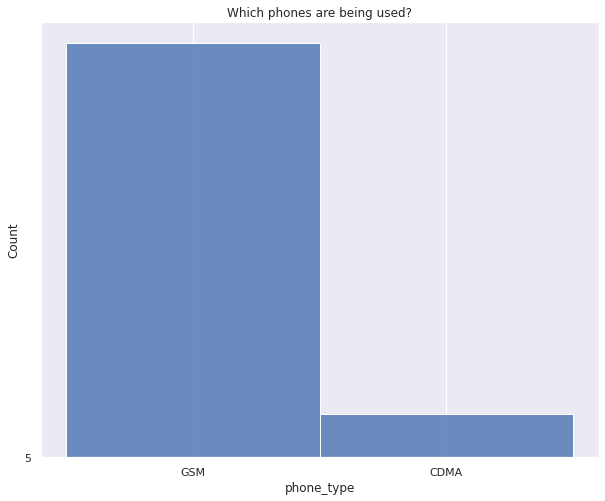

In [ ]:
phone = d['phone_type']
plt.figure(figsize=(10,8))
sns.histplot(phone, bins=15, alpha=0.8)
plt.yticks(list(range(5,10,15)))
plt.title('Which phones are being used?')
plt.show()

In [ ]:
# Convert categorical values to numerical values.
ench = d.copy()
ench.describe()

app_vrs_code   android_vrs   android_sdk      latitude     longitude  \
count  9.807100e+04  98071.000000  98071.000000  98071.000000  98071.000000   
mean   5.645072e+05     11.194726     30.194726     40.765075    -73.897012   
std    3.493227e+06      0.692781      0.692781      0.148916      0.337434   
min    3.000000e+00     10.000000     29.000000     40.300032    -74.599460   
25%    5.650000e+02     11.000000     30.000000     40.675725    -74.071638   
50%    8.430000e+02     11.000000     30.000000     40.749539    -73.932505   
75%    1.692100e+04     12.000000     31.000000     40.843182    -73.827804   
max    3.001530e+07     12.000000     31.000000     41.219676    -71.860467   

           lte_rsrp      lte_rsrq     lte_rssnr  network_generation  \
count  98071.000000  9.807100e+04  98071.000000        98071.000000   
mean     -96.634572  2.400720e+05      1.181006            3.986398   
std        9.054665  1.533283e+07      4.156752            0.129704   
min     -140.000000 -2.800000e+01   -130.000000            2.000000   
25%      -96.632480 -1.100000e+01      1.207180            4.000000   
50%      -96.632480  2.382426e+05      1.207180            4.000000   
75%      -96.632480  2.382426e+05      1.207180            4.000000   
max      -44.000000  2.147484e+09    300.000000            4.000000   

       network_type_int  is_network_roaming  network_connection_type  \
count      98071.000000        98071.000000             98071.000000   
mean          12.971235            0.005312                 0.014143   
std            0.568808            0.072693                 0.125774   
min            1.000000            0.000000                -1.000000   
25%           13.000000            0.000000                 0.000000   
50%           13.000000            0.000000                 0.000000   
75%           13.000000            0.000000                 0.000000   
max           15.000000            1.000000                 1.000000   

         sp_dl_speed    sp_dl_size    sp_ul_speed    sp_ul_size    sp_ul_time  \
count   98071.000000  9.807100e+04   98071.000000  9.807100e+04  9.807100e+04   
mean    34538.052759  2.177451e+07   13455.276260  8.492273e+06  5.506375e+03   
std     52411.010381  3.305488e+07   22111.090968  1.393036e+07  1.403042e+04   
min        -1.000000  0.000000e+00      -1.000000  0.000000e+00  1.674000e+03   
25%      1731.000000  1.094252e+06     377.000000  2.417260e+05  5.005000e+03   
50%     16035.000000  1.013868e+07    5564.000000  3.521482e+06  5.010000e+03   
75%     45888.500000  2.893090e+07   20314.500000  1.279366e+07  5.027000e+03   
max    829595.000000  5.187041e+08  687334.000000  4.297559e+08  2.504476e+06   

              month  
count  98071.000000  
mean       5.049148  
std        0.805553  
min        4.000000  
25%        4.000000  
50%        5.000000  
75%        6.000000  
max        7.000000

In [ ]:
def Encode(d):
    for column in d.columns[d.columns.isin(['name', 'package_name', 'phone_type'])]:
        d[column] = d[column].factorize()[0]
    return d

encodeddata = Encode(d.copy())

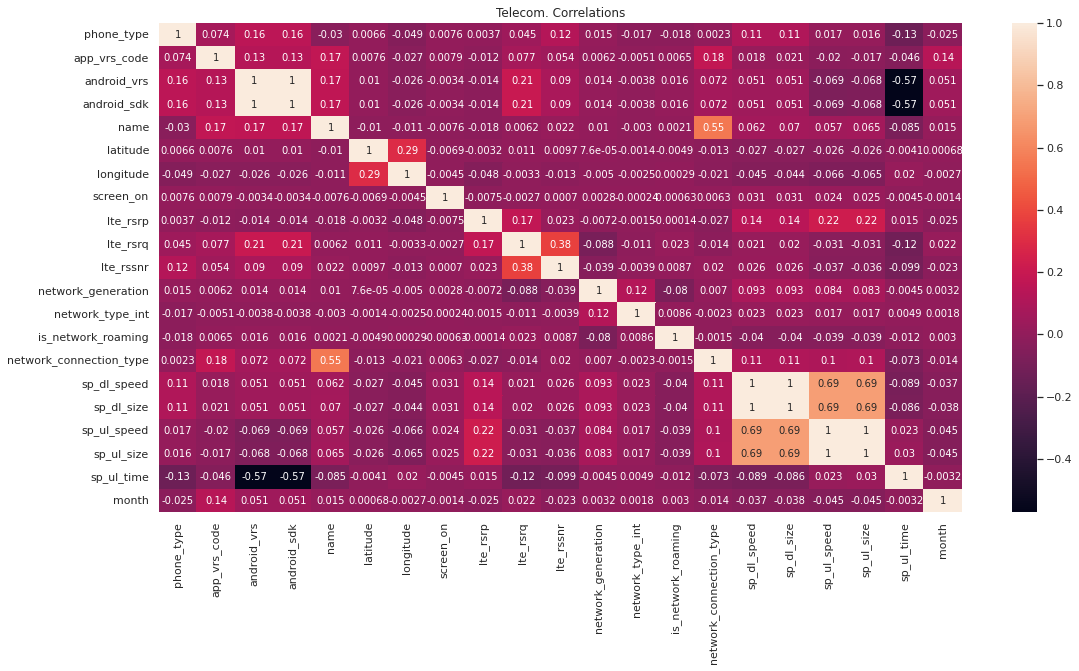

In [ ]:
#Correlation between different variables
corr = encodeddata.corr(method='spearman')
plt.figure(figsize=(18,9))
plt.title("Telecom. Correlations")
sns.heatmap(corr, annot=True)

** android_vrs / android_sdk negatively correlated to sp_ul_time 

upload speed and size to download speed and size has the greatest positive correlation 

lte_rsrp correclatred to upload size/speed followed by download size and speed

lte_rsrq androis_vrs and android_sdk **

In [ ]:
#average download speed
d.sp_dl_speed.mean()

34538.05275878223

In [ ]:
#average dl speed by manufacturer
d.groupby(by='manufacturer')['sp_dl_speed'].mean().sort_values()

manufacturer
along          6286.551020
TINNO         11734.052478
FIH           12256.411111
Wingtech      15076.303571
Coolpad       17098.180791
motorola      23933.993768
LGE           28101.281931
Yulong        33773.683036
TCL           35731.910011
HMD Global    37490.312139
samsung       38885.552751
Google        52433.146935
OnePlus       70532.091270
Name: sp_dl_speed, dtype: float64

In [ ]:
#how many manufacturers  have a DL speed less than average? 34538.05275878223
d[d['sp_dl_speed']<d.sp_dl_speed.mean()].groupby(d.manufacturer).count()

inserted_at  model  manufacturer  phone_type  app_vrs_code  \
manufacturer                                                               
Coolpad               145    145           145         145           145   
FIH                    83     83            83          83            83   
Google                646    646           646         646           646   
HMD Global            217    217           217         217           217   
LGE                  7472   7472          7472        7472          7472   
OnePlus               114    114           114         114           114   
TCL                   587    587           587         587           587   
TINNO                 613    613           613         613           613   
Wingtech              442    442           442         442           442   
Yulong                147    147           147         147           147   
along                 285    285           285         285           285   
motorola            14901  14901         14901       14901         14901   
samsung             40959  40959         40959       40959         40959   

              android_vrs  android_sdk   name  latitude  longitude  screen_on  \
manufacturer                                                                    
Coolpad               145          145    145       145        145        145   
FIH                    83           83     83        83         83         83   
Google                646          646    646       646        646        646   
HMD Global            217          217    217       217        217        217   
LGE                  7472         7472   7472      7472       7472       7472   
OnePlus               114          114    114       114        114        114   
TCL                   587          587    587       587        587        587   
TINNO                 613          613    613       613        613        613   
Wingtech              442          442    442       442        442        442   
Yulong                147          147    147       147        147        147   
along                 285          285    285       285        285        285   
motorola            14901        14901  14901     14901      14901      14901   
samsung             40959        40959  40959     40959      40959      40959   

              lte_rsrp  lte_rsrq  lte_rssnr  network_generation  \
manufacturer                                                      
Coolpad            145       145        145                 145   
FIH                 83        83         83                  83   
Google             646       646        646                 646   
HMD Global         217       217        217                 217   
LGE               7472      7472       7472                7472   
OnePlus            114       114        114                 114   
TCL                587       587        587                 587   
TINNO              613       613        613                 613   
Wingtech           442       442        442                 442   
Yulong             147       147        147                 147   
along              285       285        285                 285   
motorola         14901     14901      14901               14901   
samsung          40959     40959      40959               40959   

              network_type_int  is_network_roaming  network_connection_type  \
manufacturer                                                                  
Coolpad                    145                 145                      145   
FIH                         83                  83                       83   
Google                     646                 646                      646   
HMD Global                 217                 217                      217   
LGE                       7472                7472                     7472   
OnePlus                    114                 114                      114   
TCL                

In [ ]:
#average dl speed by model
d.groupby(by='model')['sp_dl_speed'].mean().sort_values()

model
SM-A326U1             1685.750000
Stratus_C5_Elite      6286.551020
SM-G975F              8352.428571
SM-A715F             10551.869565
SM-A022M             11274.244275
                        ...      
GM1915               70532.091270
Pixel 3 XL           73775.090909
SM-S901U1            74133.391892
T790Z               138588.634146
Pixel 4             148008.333333
Name: sp_dl_speed, Length: 79, dtype: float64

In [ ]:
#how many models  have a DL speed less than average? 34538.05275878223
d[d['sp_dl_speed']<d.sp_dl_speed.mean()].groupby(d.model).count()

inserted_at  model  manufacturer  phone_type  \
model                                                                      
5062Z                               350    350           350         350   
5087Z                               218    218           218         218   
CP3669AS                            145    145           145         145   
CP3706AS                            147    147           147         147   
EC211001                             83     83            83          83   
...                                 ...    ...           ...         ...   
moto g play (2021)                 2903   2903          2903        2903   
moto g pure                        9495   9495          9495        9495   
moto g stylus 5G                   1635   1635          1635        1635   
motorola edge 5G UW (2021)          281    281           281         281   
motorola one 5G ace                 587    587           587         587   

                            app_vrs_code  android_vrs  android_sdk  name  \
model                                                                      
5062Z                                350          350          350   350   
5087Z                                218          218          218   218   
CP3669AS                             145          145          145   145   
CP3706AS                             147          147          147   147   
EC211001                              83           83           83    83   
...                                  ...          ...          ...   ...   
moto g play (2021)                  2903         2903         2903  2903   
moto g pure                         9495         9495         9495  9495   
moto g stylus 5G                    1635         1635         1635  1635   
motorola edge 5G UW (2021)           281          281          281   281   
motorola one 5G ace                  587          587          587   587   

                            latitude  longitude  screen_on  lte_rsrp  \
model                                                                  
5062Z                            350        350        350       350   
5087Z                            218        218        218       218   
CP3669AS                         145        145        145       145   
CP3706AS                         147        147        147       147   
EC211001                          83         83         83        83   
...                              ...        ...        ...       ...   
moto g play (2021)              2903       2903       2903      2903   
moto g pure                     9495       9495       9495      9495   
moto g stylus 5G                1635       1635       1635      1635   
motorola edge 5G UW (2021)       281        281        281       281   
motorola one 5G ace              587        587        587       587   

                            lte_rsrq  lte_rssnr  network_generation  \
model                                                                 
5062Z                            350        350                 350   
5087Z                            218        218                 218   
CP3669AS                         145        145                 145   
CP3706AS                         147        147                 147   
EC211001                          83         83                  83   
...                              ...        ...                 ...   
moto g play (2021)              2903       2903                2903   
moto g pure                     9495       9495                9495   
moto g stylus 5G                1635       1635                1635   
motorola edge 5G UW (2021)       281        281                 281   
motorola one 5G ace              587        587                 587   

                            network_type_int  is_network_roaming  \
model                                                              
5062Z                                    350         

In [ ]:
#how many generations have a DL speed less than average? 34538.05275878223
d[d['sp_dl_speed']<d.sp_dl_speed.mean()].groupby(d.network_generation).count()

inserted_at  model  manufacturer  phone_type  \
network_generation                                                 
2                           163    163           163         163   
3                           954    954           954         954   
4                         65494  65494         65494       65494   

                    app_vrs_code  android_vrs  android_sdk   name  latitude  \
network_generation                                                            
2                            163          163          163    163       163   
3                            954          954          954    954       954   
4                          65494        65494        65494  65494     65494   

                    longitude  screen_on  lte_rsrp  lte_rsrq  lte_rssnr  \
network_generation                                                        
2                         163        163       163       163        163   
3                         954        954       954       954        954   
4                       65494      65494     65494     65494      65494   

                    network_generation  network_type_int  is_network_roaming  \
network_generation                                                             
2                                  163               163                 163   
3                                  954               954                 954   
4                                65494             65494               65494   

                    network_connection_type  sp_dl_speed  sp_dl_size  \
network_generation                                                     
2                                       163          163         163   
3                                       954          954         954   
4                                     65494        65494       65494   

                    sp_ul_speed  sp_ul_size  sp_ul_time  network_country  \
network_generation                                                         
2                           163         163         163              163   
3                           954         954         954              954   
4                         65494       65494       65494            65494   

                    network_name_mapped  month  
network_generation                              
2                                   163    163  
3                                   954    954  
4                                 65494  65494

4th Generation?

Text(0.5, 1.0, 'Relation of DL Size to DL Speed')

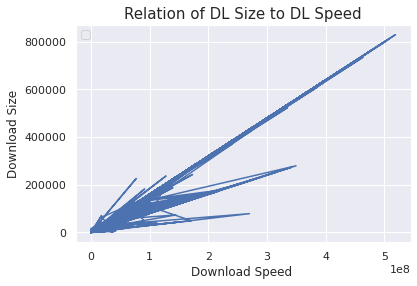

In [ ]:
#Relationship of dl size to dl speed
plt.plot(d['sp_dl_size'], d['sp_dl_speed'])
plt.legend(ncol=1, loc='upper left');

plt.xlabel("Download Speed ")
plt.ylabel("Download Size")
plt.title("Relation of DL Size to DL Speed", fontsize = 15)

Text(0.5, 1.0, 'Relation of UL Size and UL Speed to UL Time')

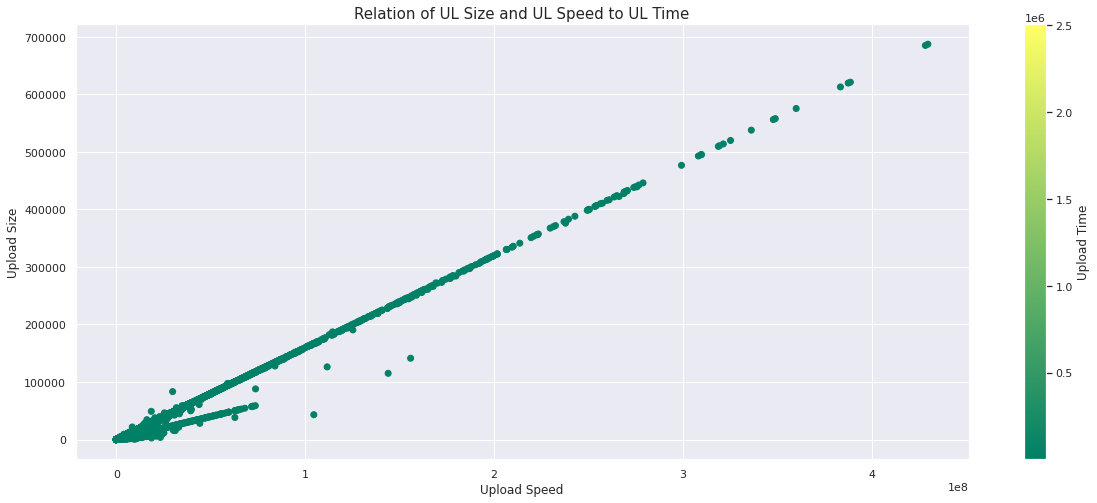

In [ ]:
# Relation of ul time to ul size and ul speed
plt.figure(figsize=(20, 8))
x, y, z = d["sp_ul_size"], d["sp_ul_speed"], d["sp_ul_time"]

sc = plt.scatter(x, y, c = z, cmap="summer")
plt.xlabel("Upload Speed")
plt.ylabel("Upload Size")
plt.colorbar(sc, label = "Upload Time")
plt.title("Relation of UL Size and UL Speed to UL Time", fontsize = 15)

In [ ]:
#average upload speed
d.sp_ul_speed.mean()

13455.276259921708

In [ ]:
#average ul speed by manufacturer
d.groupby(by='manufacturer')['sp_ul_speed'].mean().sort_values()

manufacturer
FIH            5633.577778
along          7279.170068
Wingtech       8556.573413
TINNO          9497.248196
Coolpad       10216.751412
Yulong        11963.263393
samsung       13397.013131
LGE           13578.205478
motorola      13607.052453
TCL           14443.110236
HMD Global    15344.424855
Google        17093.600336
OnePlus       22438.250000
Name: sp_ul_speed, dtype: float64

In [ ]:
#how many manufacturers  have a UL speed less than average? 13455.276259921708
d[d['sp_ul_speed']<d.sp_ul_speed.mean()].groupby(d.manufacturer).count()

inserted_at  model  manufacturer  phone_type  app_vrs_code  \
manufacturer                                                               
Coolpad               132    132           132         132           132   
FIH                    76     76            76          76            76   
Google                762    762           762         762           762   
HMD Global            226    226           226         226           226   
LGE                  6886   6886          6886        6886          6886   
OnePlus               126    126           126         126           126   
TCL                   574    574           574         574           574   
TINNO                 523    523           523         523           523   
Wingtech              415    415           415         415           415   
Yulong                153    153           153         153           153   
along                 254    254           254         254           254   
motorola            12686  12686         12686       12686         12686   
samsung             43291  43291         43291       43291         43291   

              android_vrs  android_sdk   name  latitude  longitude  screen_on  \
manufacturer                                                                    
Coolpad               132          132    132       132        132        132   
FIH                    76           76     76        76         76         76   
Google                762          762    762       762        762        762   
HMD Global            226          226    226       226        226        226   
LGE                  6886         6886   6886      6886       6886       6886   
OnePlus               126          126    126       126        126        126   
TCL                   574          574    574       574        574        574   
TINNO                 523          523    523       523        523        523   
Wingtech              415          415    415       415        415        415   
Yulong                153          153    153       153        153        153   
along                 254          254    254       254        254        254   
motorola            12686        12686  12686     12686      12686      12686   
samsung             43291        43291  43291     43291      43291      43291   

              lte_rsrp  lte_rsrq  lte_rssnr  network_generation  \
manufacturer                                                      
Coolpad            132       132        132                 132   
FIH                 76        76         76                  76   
Google             762       762        762                 762   
HMD Global         226       226        226                 226   
LGE               6886      6886       6886                6886   
OnePlus            126       126        126                 126   
TCL                574       574        574                 574   
TINNO              523       523        523                 523   
Wingtech           415       415        415                 415   
Yulong             153       153        153                 153   
along              254       254        254                 254   
motorola         12686     12686      12686               12686   
samsung          43291     43291      43291               43291   

              network_type_int  is_network_roaming  network_connection_type  \
manufacturer                                                                  
Coolpad                    132                 132                      132   
FIH                         76                  76                       76   
Google                     762                 762                      762   
HMD Global                 226                 226                      226   
LGE                       6886                6886                     6886   
OnePlus                    126                 126                      126   
TCL                

In [ ]:
#average ul speed by model
d.groupby(by='model')['sp_ul_speed'].mean().sort_values()

model
SM-A326U1     1251.500000
SM-G975F      4007.785714
SM-G781V      5384.000000
EC211001      5633.577778
SM-G970U1     6870.230769
                 ...     
GM1915       22438.250000
SM-G981V     24556.789474
T790Z        30296.804878
SM-S901U1    37180.270270
SM-A536U1    44208.942308
Name: sp_ul_speed, Length: 79, dtype: float64

In [ ]:
#how many models  have a UL speed less than average? 13455.276259921708
d[d['sp_ul_speed']<d.sp_ul_speed.mean()].groupby(d.model).count()

inserted_at  model  manufacturer  phone_type  \
model                                                                      
5062Z                               352    352           352         352   
5087Z                               202    202           202         202   
CP3669AS                            132    132           132         132   
CP3706AS                            153    153           153         153   
EC211001                             76     76            76          76   
...                                 ...    ...           ...         ...   
moto g play (2021)                 2642   2642          2642        2642   
moto g pure                        7396   7396          7396        7396   
moto g stylus 5G                   1649   1649          1649        1649   
motorola edge 5G UW (2021)          335    335           335         335   
motorola one 5G ace                 664    664           664         664   

                            app_vrs_code  android_vrs  android_sdk  name  \
model                                                                      
5062Z                                352          352          352   352   
5087Z                                202          202          202   202   
CP3669AS                             132          132          132   132   
CP3706AS                             153          153          153   153   
EC211001                              76           76           76    76   
...                                  ...          ...          ...   ...   
moto g play (2021)                  2642         2642         2642  2642   
moto g pure                         7396         7396         7396  7396   
moto g stylus 5G                    1649         1649         1649  1649   
motorola edge 5G UW (2021)           335          335          335   335   
motorola one 5G ace                  664          664          664   664   

                            latitude  longitude  screen_on  lte_rsrp  \
model                                                                  
5062Z                            352        352        352       352   
5087Z                            202        202        202       202   
CP3669AS                         132        132        132       132   
CP3706AS                         153        153        153       153   
EC211001                          76         76         76        76   
...                              ...        ...        ...       ...   
moto g play (2021)              2642       2642       2642      2642   
moto g pure                     7396       7396       7396      7396   
moto g stylus 5G                1649       1649       1649      1649   
motorola edge 5G UW (2021)       335        335        335       335   
motorola one 5G ace              664        664        664       664   

                            lte_rsrq  lte_rssnr  network_generation  \
model                                                                 
5062Z                            352        352                 352   
5087Z                            202        202                 202   
CP3669AS                         132        132                 132   
CP3706AS                         153        153                 153   
EC211001                          76         76                  76   
...                              ...        ...                 ...   
moto g play (2021)              2642       2642                2642   
moto g pure                     7396       7396                7396   
moto g stylus 5G                1649       1649                1649   
motorola edge 5G UW (2021)       335        335                 335   
motorola one 5G ace              664        664                 664   

                            network_type_int  is_network_roaming  \
model                                                              
5062Z                                    352         

In [ ]:
#how many generations have a UL speed less than average? 13455.276259921708
d[d['sp_ul_speed']<d.sp_ul_speed.mean()].groupby(d.network_generation).count()

inserted_at  model  manufacturer  phone_type  \
network_generation                                                 
2                           159    159           159         159   
3                           939    939           939         939   
4                         65006  65006         65006       65006   

                    app_vrs_code  android_vrs  android_sdk   name  latitude  \
network_generation                                                            
2                            159          159          159    159       159   
3                            939          939          939    939       939   
4                          65006        65006        65006  65006     65006   

                    longitude  screen_on  lte_rsrp  lte_rsrq  lte_rssnr  \
network_generation                                                        
2                         159        159       159       159        159   
3                         939        939       939       939        939   
4                       65006      65006     65006     65006      65006   

                    network_generation  network_type_int  is_network_roaming  \
network_generation                                                             
2                                  159               159                 159   
3                                  939               939                 939   
4                                65006             65006               65006   

                    network_connection_type  sp_dl_speed  sp_dl_size  \
network_generation                                                     
2                                       159          159         159   
3                                       939          939         939   
4                                     65006        65006       65006   

                    sp_ul_speed  sp_ul_size  sp_ul_time  network_country  \
network_generation                                                         
2                           159         159         159              159   
3                           939         939         939              939   
4                         65006       65006       65006            65006   

                    network_name_mapped  month  
network_generation                              
2                                   159    159  
3                                   939    939  
4                                 65006  65006

4th Generation?

In [ ]:
#average upload time
d.sp_ul_time.mean()

5506.374824078064

In [ ]:
#average ul time by manufacturer
d.groupby(by='manufacturer')['sp_ul_time'].mean().sort_values()

manufacturer
Coolpad       5043.073446
FIH           5046.355556
HMD Global    5046.890173
LGE           5119.596270
motorola      5128.262197
TCL           5135.762655
along         5184.826531
TINNO         5229.850014
Yulong        5432.285714
Wingtech      5526.446429
Google        5533.959790
OnePlus       5558.900794
samsung       5697.079687
Name: sp_ul_time, dtype: float64

In [ ]:
#how many manufacturers  have a UL time less than average? 5506.374824078064
d[d['sp_ul_time']<d.sp_ul_time.mean()].groupby(d.manufacturer).count()

inserted_at  model  manufacturer  phone_type  app_vrs_code  \
manufacturer                                                               
Coolpad               177    177           177         177           177   
FIH                    89     89            89          89            89   
Google               1175   1175          1175        1175          1175   
HMD Global            345    345           345         345           345   
LGE                 10367  10367         10367       10367         10367   
OnePlus               240    240           240         240           240   
TCL                   886    886           886         886           886   
TINNO                 671    671           671         671           671   
Wingtech              493    493           493         493           493   
Yulong                221    221           221         221           221   
along                 286    286           286         286           286   
motorola            18897  18897         18897       18897         18897   
samsung             62158  62158         62158       62158         62158   

              android_vrs  android_sdk   name  latitude  longitude  screen_on  \
manufacturer                                                                    
Coolpad               177          177    177       177        177        177   
FIH                    89           89     89        89         89         89   
Google               1175         1175   1175      1175       1175       1175   
HMD Global            345          345    345       345        345        345   
LGE                 10367        10367  10367     10367      10367      10367   
OnePlus               240          240    240       240        240        240   
TCL                   886          886    886       886        886        886   
TINNO                 671          671    671       671        671        671   
Wingtech              493          493    493       493        493        493   
Yulong                221          221    221       221        221        221   
along                 286          286    286       286        286        286   
motorola            18897        18897  18897     18897      18897      18897   
samsung             62158        62158  62158     62158      62158      62158   

              lte_rsrp  lte_rsrq  lte_rssnr  network_generation  \
manufacturer                                                      
Coolpad            177       177        177                 177   
FIH                 89        89         89                  89   
Google            1175      1175       1175                1175   
HMD Global         345       345        345                 345   
LGE              10367     10367      10367               10367   
OnePlus            240       240        240                 240   
TCL                886       886        886                 886   
TINNO              671       671        671                 671   
Wingtech           493       493        493                 493   
Yulong             221       221        221                 221   
along              286       286        286                 286   
motorola         18897     18897      18897               18897   
samsung          62158     62158      62158               62158   

              network_type_int  is_network_roaming  network_connection_type  \
manufacturer                                                                  
Coolpad                    177                 177                      177   
FIH                         89                  89                       89   
Google                    1175                1175                     1175   
HMD Global                 345                 345                      345   
LGE                      10367               10367                    10367   
OnePlus                    240                 240                      240   
TCL                

In [ ]:
#average ul time by model
d.groupby(by='model')['sp_ul_time'].mean().sort_values()

model
SM-A326U1     5004.500000
SM-G781V      5004.750000
SM-G981V      5005.473684
SM-G970U1     5007.769231
Pixel 3 XL    5019.727273
                 ...     
SM-S901U      7519.912602
SM-A515U1     7707.794872
SM-G990U1     8409.603960
SM-N976U      8563.718447
SM-G986U1     9601.825688
Name: sp_ul_time, Length: 79, dtype: float64

In [ ]:
#how many models  have a UL time less than average? 5506.374824078064
d[d['sp_ul_time']<d.sp_ul_time.mean()].groupby(d.model).count()

inserted_at  model  manufacturer  phone_type  \
model                                                                      
5062Z                               525    525           525         525   
5087Z                               320    320           320         320   
CP3669AS                            177    177           177         177   
CP3706AS                            221    221           221         221   
EC211001                             89     89            89          89   
...                                 ...    ...           ...         ...   
moto g play (2021)                 3645   3645          3645        3645   
moto g pure                       11813  11813         11813       11813   
moto g stylus 5G                   2112   2112          2112        2112   
motorola edge 5G UW (2021)          489    489           489         489   
motorola one 5G ace                 838    838           838         838   

                            app_vrs_code  android_vrs  android_sdk   name  \
model                                                                       
5062Z                                525          525          525    525   
5087Z                                320          320          320    320   
CP3669AS                             177          177          177    177   
CP3706AS                             221          221          221    221   
EC211001                              89           89           89     89   
...                                  ...          ...          ...    ...   
moto g play (2021)                  3645         3645         3645   3645   
moto g pure                        11813        11813        11813  11813   
moto g stylus 5G                    2112         2112         2112   2112   
motorola edge 5G UW (2021)           489          489          489    489   
motorola one 5G ace                  838          838          838    838   

                            latitude  longitude  screen_on  lte_rsrp  \
model                                                                  
5062Z                            525        525        525       525   
5087Z                            320        320        320       320   
CP3669AS                         177        177        177       177   
CP3706AS                         221        221        221       221   
EC211001                          89         89         89        89   
...                              ...        ...        ...       ...   
moto g play (2021)              3645       3645       3645      3645   
moto g pure                    11813      11813      11813     11813   
moto g stylus 5G                2112       2112       2112      2112   
motorola edge 5G UW (2021)       489        489        489       489   
motorola one 5G ace              838        838        838       838   

                            lte_rsrq  lte_rssnr  network_generation  \
model                                                                 
5062Z                            525        525                 525   
5087Z                            320        320                 320   
CP3669AS                         177        177                 177   
CP3706AS                         221        221                 221   
EC211001                          89         89                  89   
...                              ...        ...                 ...   
moto g play (2021)              3645       3645                3645   
moto g pure                    11813      11813               11813   
moto g stylus 5G                2112       2112                2112   
motorola edge 5G UW (2021)       489        489                 489   
motorola one 5G ace              838        838                 838   

                            network_type_int  is_network_roaming  \
model                                                              
5062Z                                   

In [ ]:
#how many generations have a UL time less than average? 5506.374824078064
d[d['sp_ul_time']<d.sp_ul_time.mean()].groupby(d.network_generation).count()

inserted_at  model  manufacturer  phone_type  \
network_generation                                                 
2                           162    162           162         162   
3                           981    981           981         981   
4                         94862  94862         94862       94862   

                    app_vrs_code  android_vrs  android_sdk   name  latitude  \
network_generation                                                            
2                            162          162          162    162       162   
3                            981          981          981    981       981   
4                          94862        94862        94862  94862     94862   

                    longitude  screen_on  lte_rsrp  lte_rsrq  lte_rssnr  \
network_generation                                                        
2                         162        162       162       162        162   
3                         981        981       981       981        981   
4                       94862      94862     94862     94862      94862   

                    network_generation  network_type_int  is_network_roaming  \
network_generation                                                             
2                                  162               162                 162   
3                                  981               981                 981   
4                                94862             94862               94862   

                    network_connection_type  sp_dl_speed  sp_dl_size  \
network_generation                                                     
2                                       162          162         162   
3                                       981          981         981   
4                                     94862        94862       94862   

                    sp_ul_speed  sp_ul_size  sp_ul_time  network_country  \
network_generation                                                         
2                           162         162         162              162   
3                           981         981         981              981   
4                         94862       94862       94862            94862   

                    network_name_mapped  month  
network_generation                              
2                                   162    162  
3                                   981    981  
4                                 94862  94862

4th generation? 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



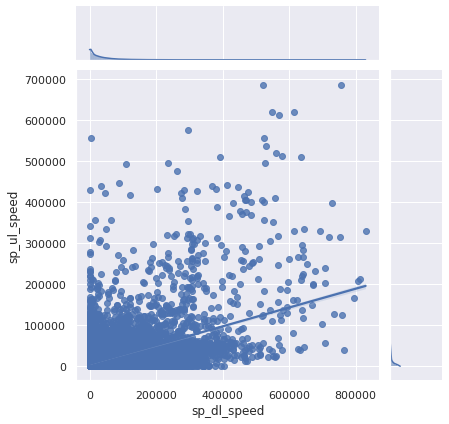

In [ ]:
sns.jointplot("sp_dl_speed", "sp_ul_speed", data = d, kind='reg')

Text(0.5, 1.0, 'Relation of UL Size to UL Speed')

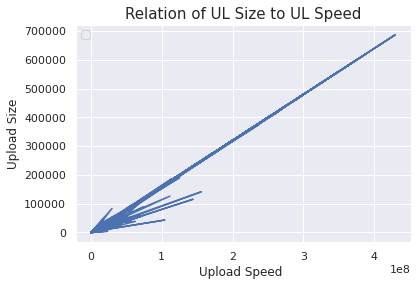

In [ ]:
#Relationship of ul size to ul speed
plt.plot(d['sp_ul_size'], d['sp_ul_speed'])
plt.legend(ncol=1, loc='upper left');

plt.xlabel("Upload Speed ")
plt.ylabel("Upload Size")
plt.title("Relation of UL Size to UL Speed", fontsize = 15)

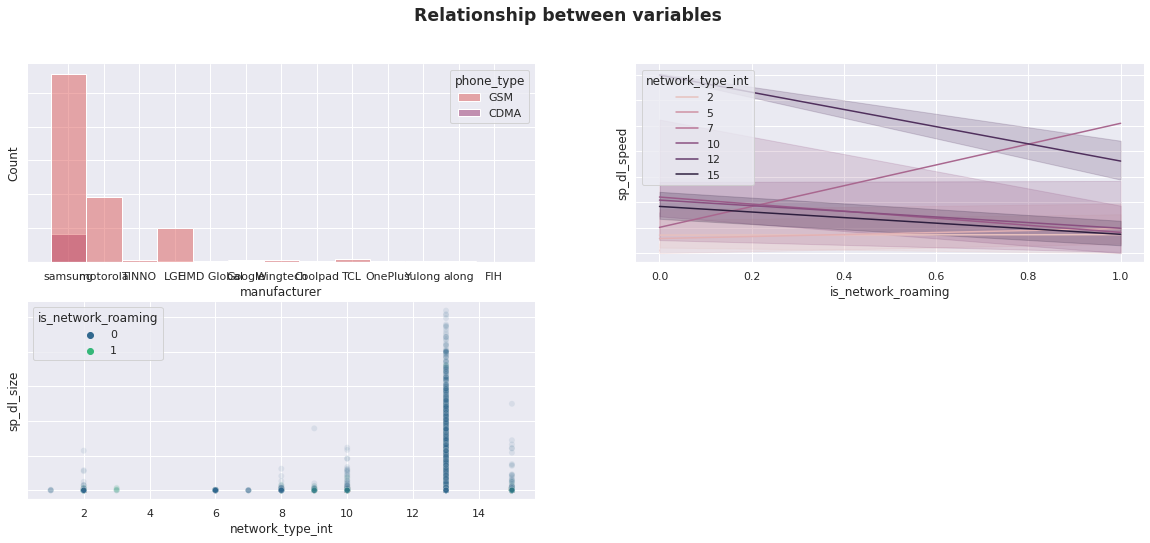

In [ ]:
#plotting relationships
fig=plt.figure(figsize=(20,8),facecolor='white')

plt.suptitle('Relationship between variables',fontsize="xx-large",fontweight="bold")

gs=fig.add_gridspec(2,2)


ax=[_ for i in range(3)]

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])
ax[2]=fig.add_subplot(gs[1,0])

for i in range(3):
    ax[i].set_yticklabels([])
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ["top","right", 'left']:
        ax[i].spines[direction].set_visible(False)
    
sns.histplot(data=d,x='manufacturer',hue='phone_type',ax=ax[0],palette='flare')
sns.lineplot(data=d,x='is_network_roaming',y='sp_dl_speed',ax=ax[1],hue='network_type_int')
sns.scatterplot(data=d,x='network_type_int',y='sp_dl_size',hue='is_network_roaming',ax=ax[2],palette='viridis',markers='o',alpha=0.1)

Text(0.5, 1.0, 'Relation of DL Size and DL Speed to UL Time')

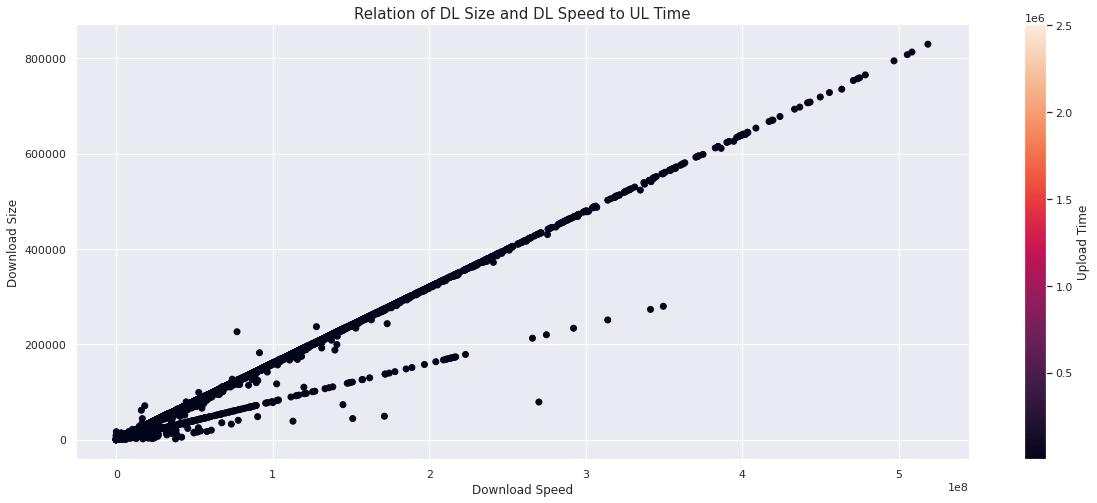

In [ ]:
# Relation of ul time to dl size and dl speed
plt.figure(figsize=(20, 8))
x, y, z = d["sp_dl_size"], d["sp_dl_speed"], d["sp_ul_time"]

sc = plt.scatter(x, y, c = z)
plt.xlabel("Download Speed")
plt.ylabel("Download Size")
plt.colorbar(sc, label = "Upload Time")
plt.title("Relation of DL Size and DL Speed to UL Time", fontsize = 15)

Text(0.5, 1.0, 'Relation of DL Size and UL Speed to Reference Signal Received Power')

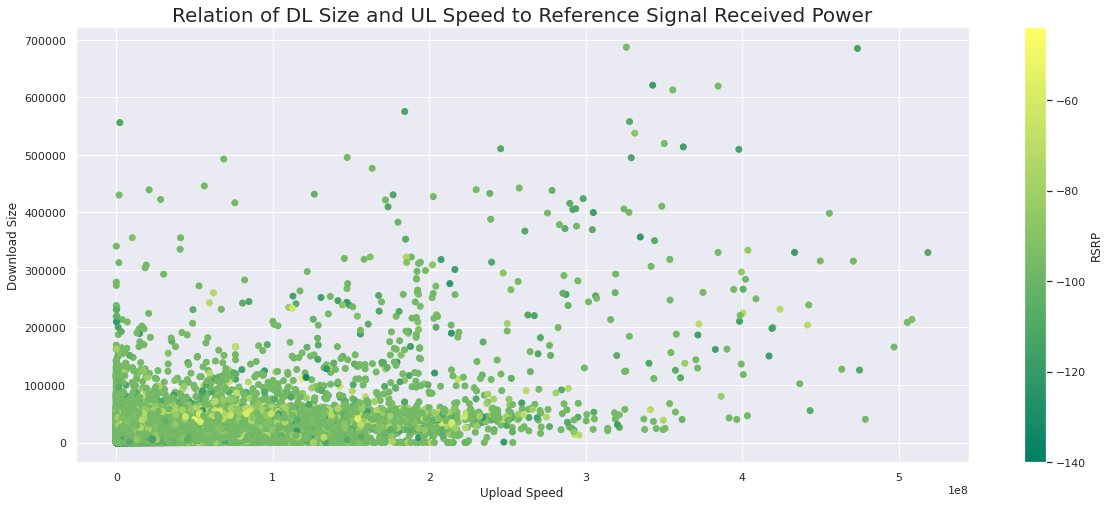

In [ ]:
# Relation of lte_rsrp to DL Size and UL Speed
plt.figure(figsize=(20, 8))
x, y, z = d["sp_dl_size"], d["sp_ul_speed"], d["lte_rsrp"]

sc = plt.scatter(x, y, c = z, cmap="summer")
plt.xlabel("Upload Speed")
plt.ylabel("Download Size")
plt.colorbar(sc, label = "RSRP")
plt.title("Relation of DL Size and UL Speed to Reference Signal Received Power", fontsize = 20)

Text(0.5, 1.0, 'Relation of UL Size and DL Speed to Reference Signal Received Power')

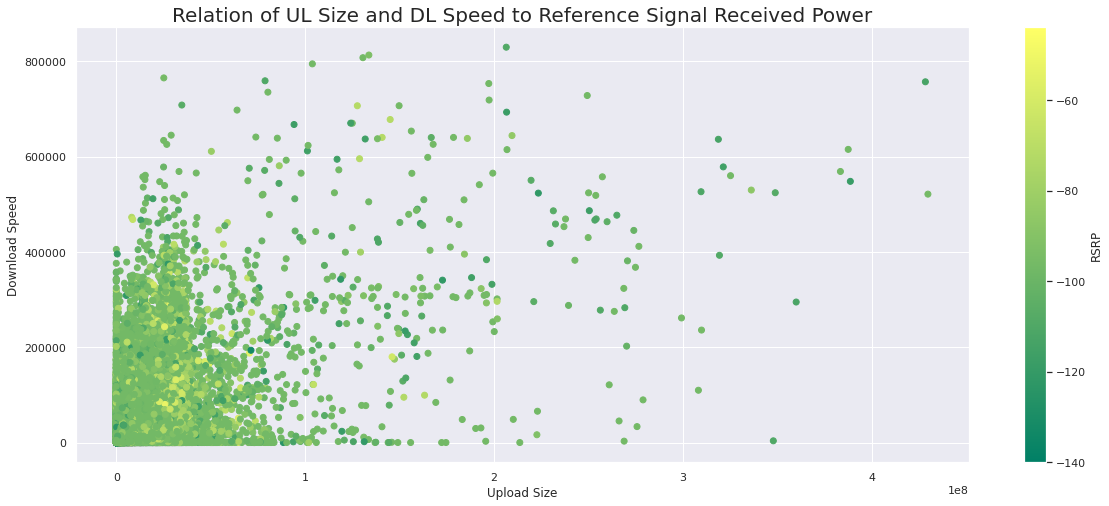

In [ ]:
# Relation of lte_rsrp to UL Size and DL Speed
plt.figure(figsize=(20, 8))
x, y, z = d["sp_ul_size"], d["sp_dl_speed"], d["lte_rsrp"]

sc = plt.scatter(x, y, c = z, cmap="summer")
plt.xlabel("Upload Size")
plt.ylabel("Download Speed")
plt.colorbar(sc, label = "RSRP")
plt.title("Relation of UL Size and DL Speed to Reference Signal Received Power", fontsize = 20)

Text(0, 0.5, 'Total')

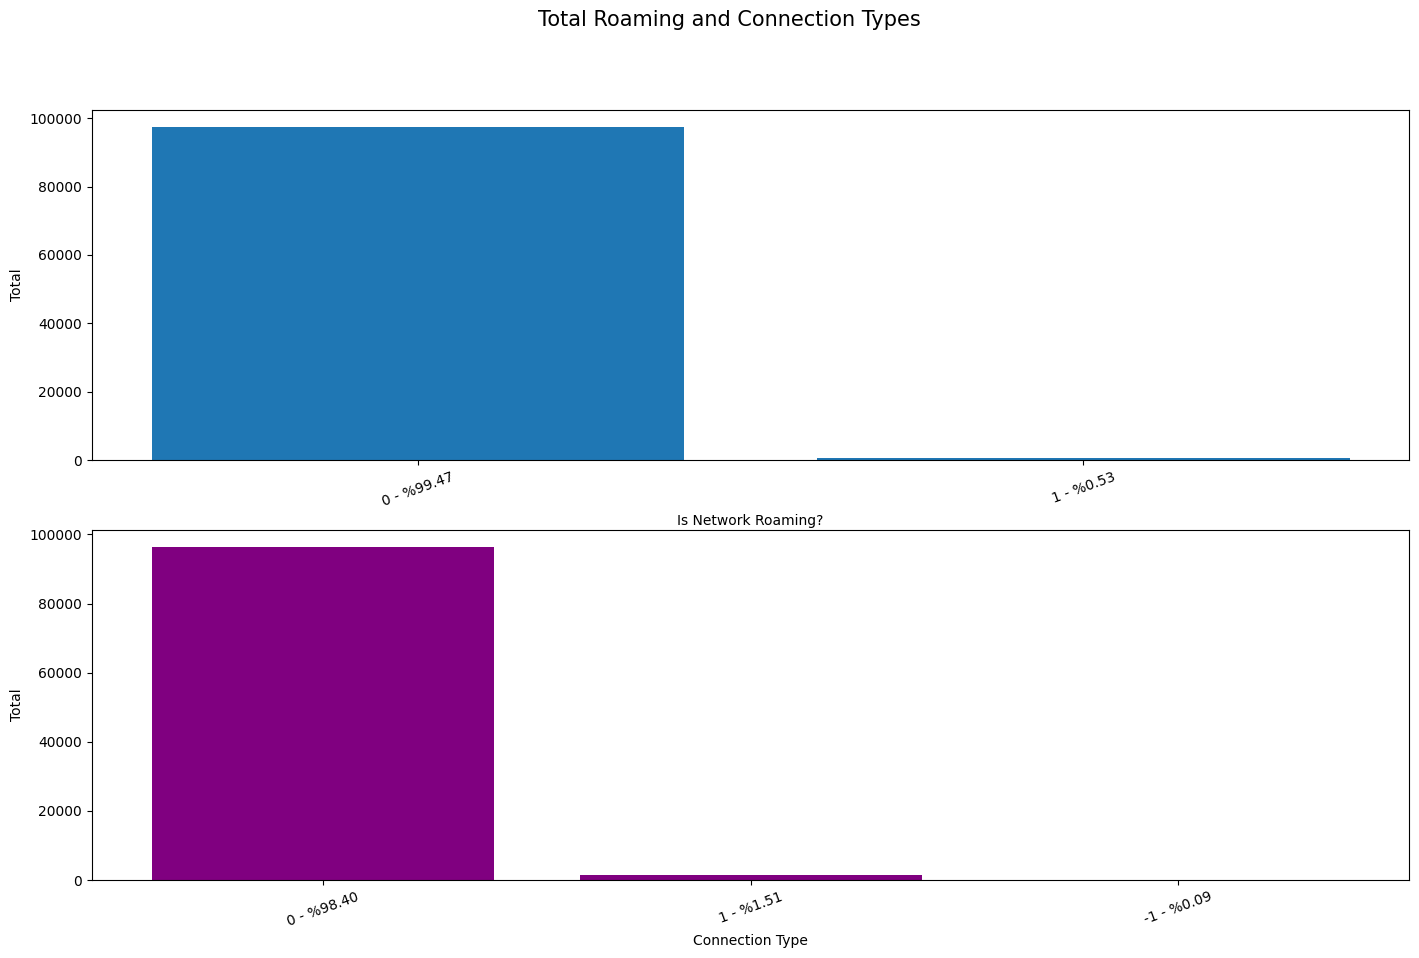

In [ ]:
plt.style.use('default')

plt.figure(figsize=(17, 10))
plt.suptitle("Total Roaming and Connection Types", fontsize = 15)

# # # # # # # # # # # # # # # # # # # # # # # # Bedroom

Roaming = d.value_counts("is_network_roaming")
labels = list()
for i, j in enumerate(Roaming ):
    labels.append("{} - %{:.2f}".format(Roaming .index[i], 100*j/Roaming .sum()))
    
plt.subplot(2,1,1)
plt.bar(labels, Roaming )
plt.xticks(rotation = 20)
plt.xlabel("Is Network Roaming?")
plt.ylabel("Total")

# # # # # # # # # # # # # # # # # # # # # # # # Bathroom

Type = d.value_counts("network_connection_type")
labels = list()
for i, j in enumerate(Type):
    labels.append("{} - %{:.2f}".format(Type.index[i], 100*j/Type.sum()))
    
plt.subplot(2,1,2)
plt.bar(labels, Type, color = "purple")
plt.xticks(rotation = 20)
plt.xlabel("Connection Type")
plt.ylabel("Total")


In [ ]:
d.head(2)

inserted_at      model manufacturer phone_type  app_vrs_code  \
0  2022-06-28 16:00:00   SM-A025U      samsung        GSM           625   
1  2022-05-05 17:00:00  SM-A015T1      samsung        GSM           565   

   android_vrs  android_sdk    name   latitude  longitude  screen_on  \
0           11           30  speeds  40.920688 -74.183931       True   
1           10           29  speeds  40.706394 -73.533973       True   

   lte_rsrp       lte_rsrq  lte_rssnr  network_generation  network_type_int  \
0 -96.63248  238242.620188    1.20718                   4                13   
1 -96.63248  238242.620188    1.20718                   4                13   

   is_network_roaming  network_connection_type  sp_dl_speed  sp_dl_size  \
0                   0                        0          0.0         0.0   
1                   0                        0          0.0         0.0   

   sp_ul_speed  sp_ul_size  sp_ul_time network_country network_name_mapped  \
0         18.0     11377.0      5018.0             USA   Metro by T-Mobile   
1          0.0         0.0      5055.0             USA   Metro by T-Mobile   

   month  
0      6  
1      5

In [ ]:
# mean dl speed by netwrok type
d.groupby('network_type_int')['sp_dl_speed'].mean().sort_values()

network_type_int
7         0.000000
6       592.516667
1       630.400000
2      3535.432099
3      3985.857143
8      5272.858696
15     8766.812865
9      9972.191489
10    10142.945055
13    34862.563291
Name: sp_dl_speed, dtype: float64

Network 7??

In [ ]:
# mean dl size by netwrok type
d.groupby('network_type_int')['sp_dl_size'].mean().sort_values()

network_type_int
7     0.000000e+00
6     3.707383e+05
1     3.943336e+05
2     2.231192e+06
3     2.501465e+06
8     3.310885e+06
15    5.554558e+06
9     6.279492e+06
10    6.435548e+06
13    2.197885e+07
Name: sp_dl_size, dtype: float64

Network 7?

In [ ]:
# mean ul speed by netwrok type
d.groupby('network_type_int')['sp_ul_speed'].mean().sort_values()

network_type_int
1        65.600000
6       690.200000
7       969.750000
3       984.428571
2      2963.259259
15     3172.748538
8      3564.054348
9      5016.957447
10     5834.505495
13    13572.730033
Name: sp_ul_speed, dtype: float64

In [ ]:
# mean ul size by netwrok type
d.groupby('network_type_int')['sp_ul_size'].mean().sort_values()

network_type_int
1     4.091720e+04
6     4.334886e+05
7     6.070712e+05
3     6.166323e+05
2     1.858150e+06
15    1.997576e+06
8     2.238718e+06
9     3.140586e+06
10    3.670011e+06
13    8.566510e+06
Name: sp_ul_size, dtype: float64

In [ ]:
# mean lte rsp by netwrok type
d.groupby('network_type_int')['lte_rsrp'].mean().sort_values()

network_type_int
15   -96.765317
2    -96.760474
13   -96.634503
1    -96.632480
3    -96.632480
6    -96.632480
7    -96.632480
10   -96.552426
8    -96.260035
9    -96.129661
Name: lte_rsrp, dtype: float64

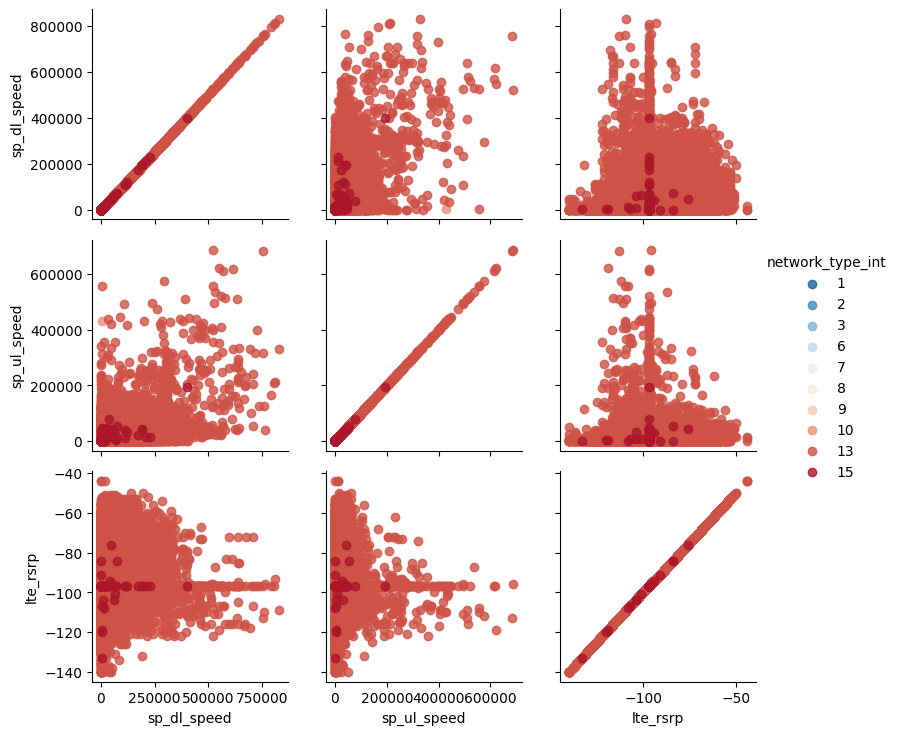

In [ ]:
#Heat Map of Correlations
g = sns.PairGrid(d, vars=['sp_dl_speed', 'sp_ul_speed', 'lte_rsrp'],
                 hue='network_type_int', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

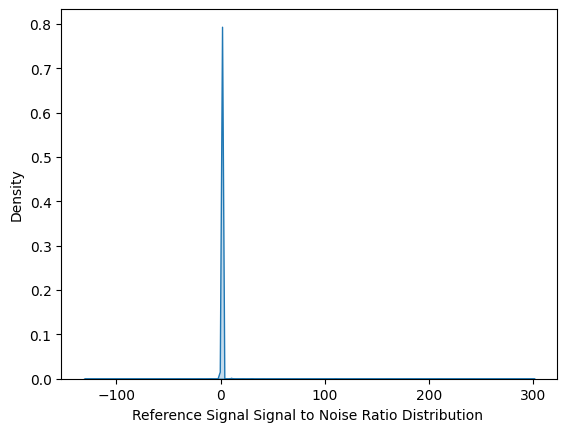

In [ ]:
#distribution of Reference Signal Signal to Noise Ratio
sns.kdeplot(d["lte_rssnr"], label='FC', shade=True)
plt.xlabel('Reference Signal Signal to Noise Ratio Distribution ');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



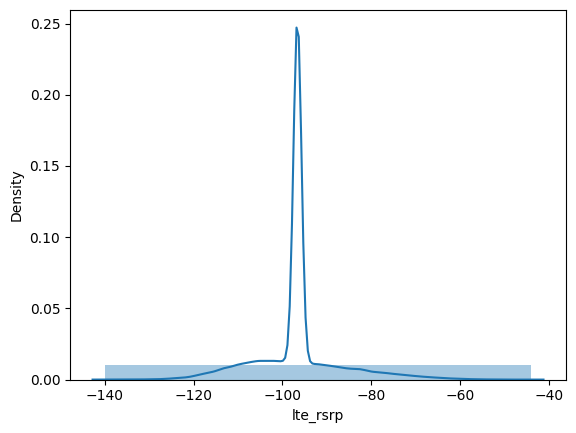

In [ ]:
sns.distplot(d['lte_rsrp'], bins=1, kde= True)

Text(0.5, 1.0, 'Relation of UL Size and RSRP to SDK')

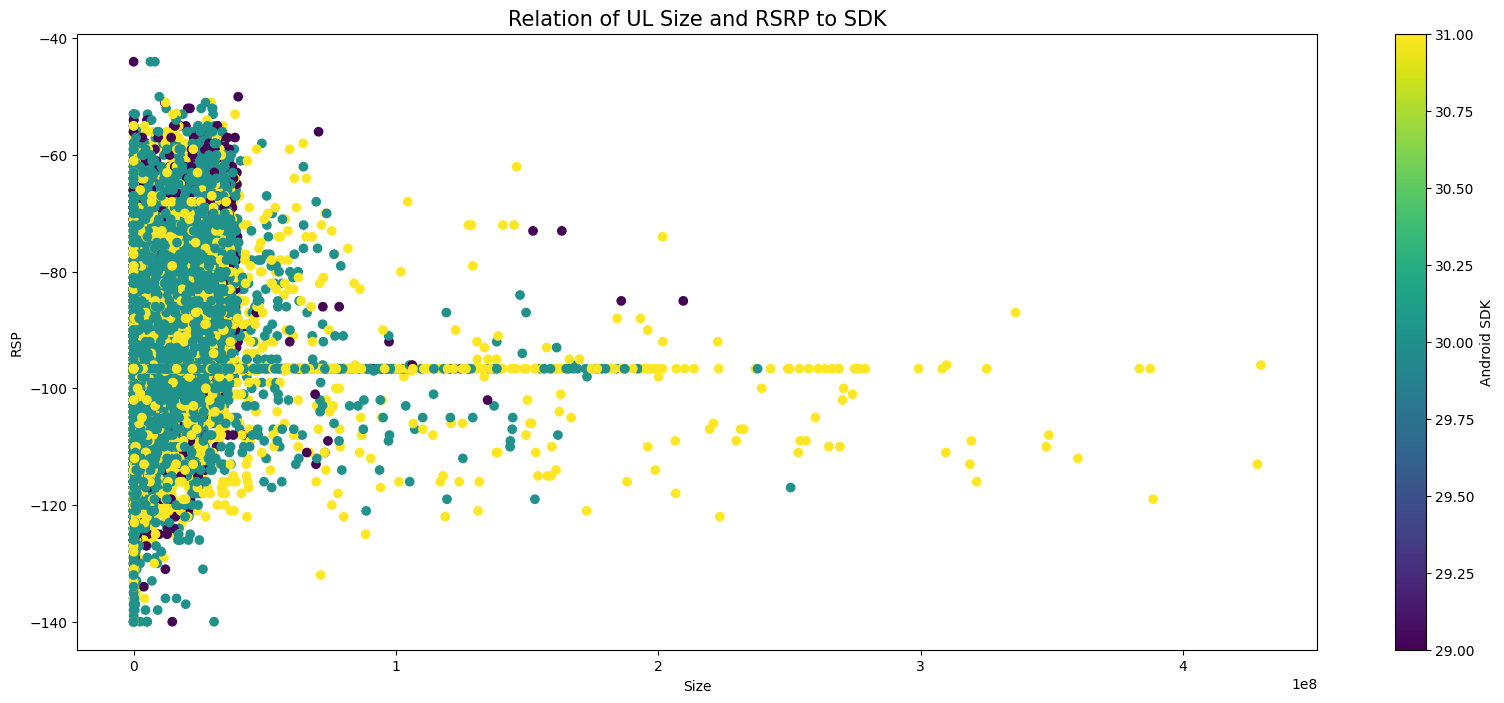

In [ ]:
# Relationhip 
plt.figure(figsize=(20, 8))
x, y, z = d["sp_ul_size"], d["lte_rsrp"], d["android_sdk"]

sc = plt.scatter(x, y, c = z)
plt.xlabel("Size")
plt.ylabel("RSP")
plt.colorbar(sc, label = "Android SDK")
plt.title("Relation of UL Size and RSRP to SDK", fontsize = 15)

Text(0.5, 1.0, 'Relation of Anroid Version and SDK')

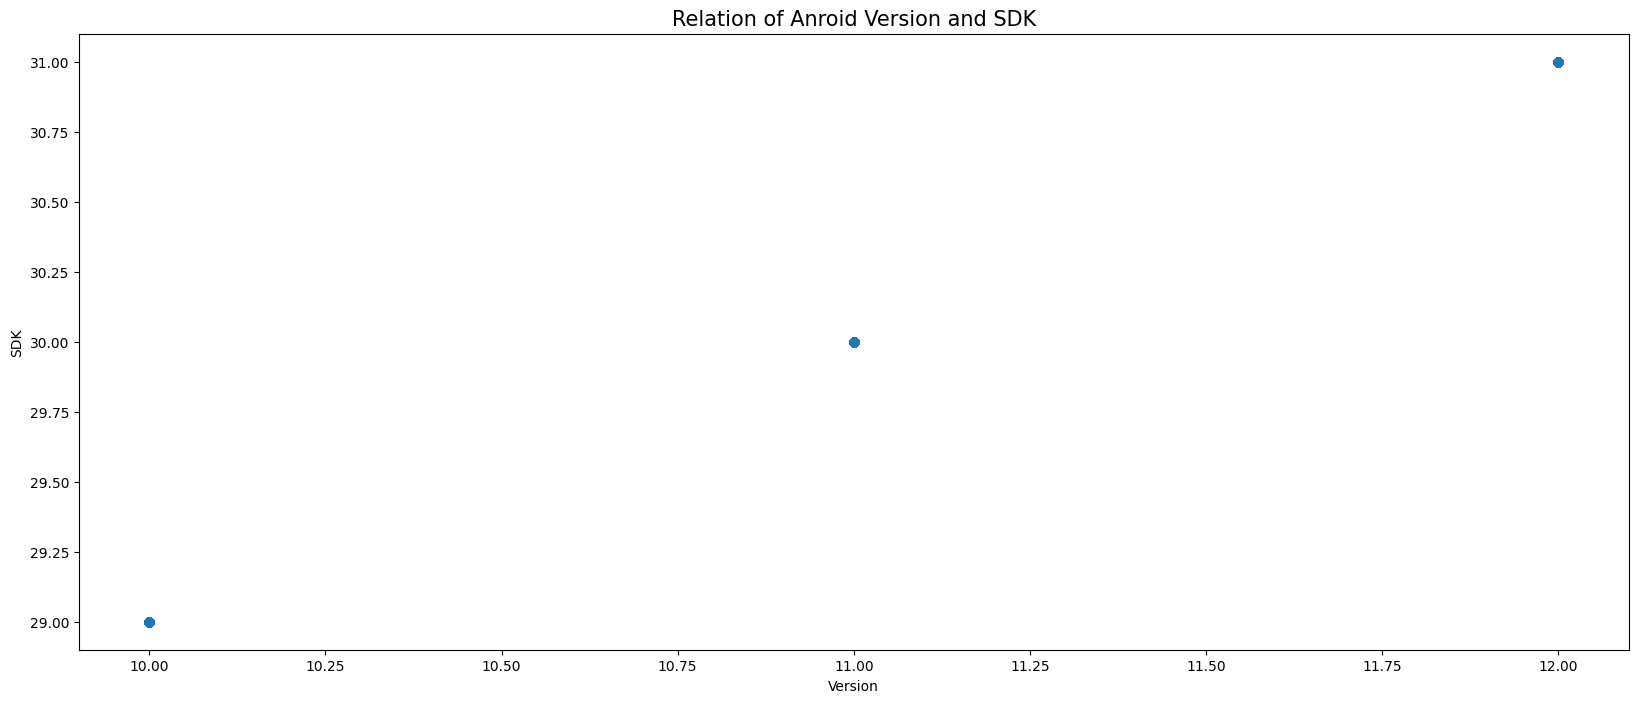

In [ ]:
# Relationhip of android_vrs and android_sdk
plt.figure(figsize=(20, 8))
x, y = d["android_vrs"], d["android_sdk"]

sc = plt.scatter(x, y)
plt.xlabel("Version")
plt.ylabel("SDK")
plt.title("Relation of Anroid Version and SDK", fontsize = 15)

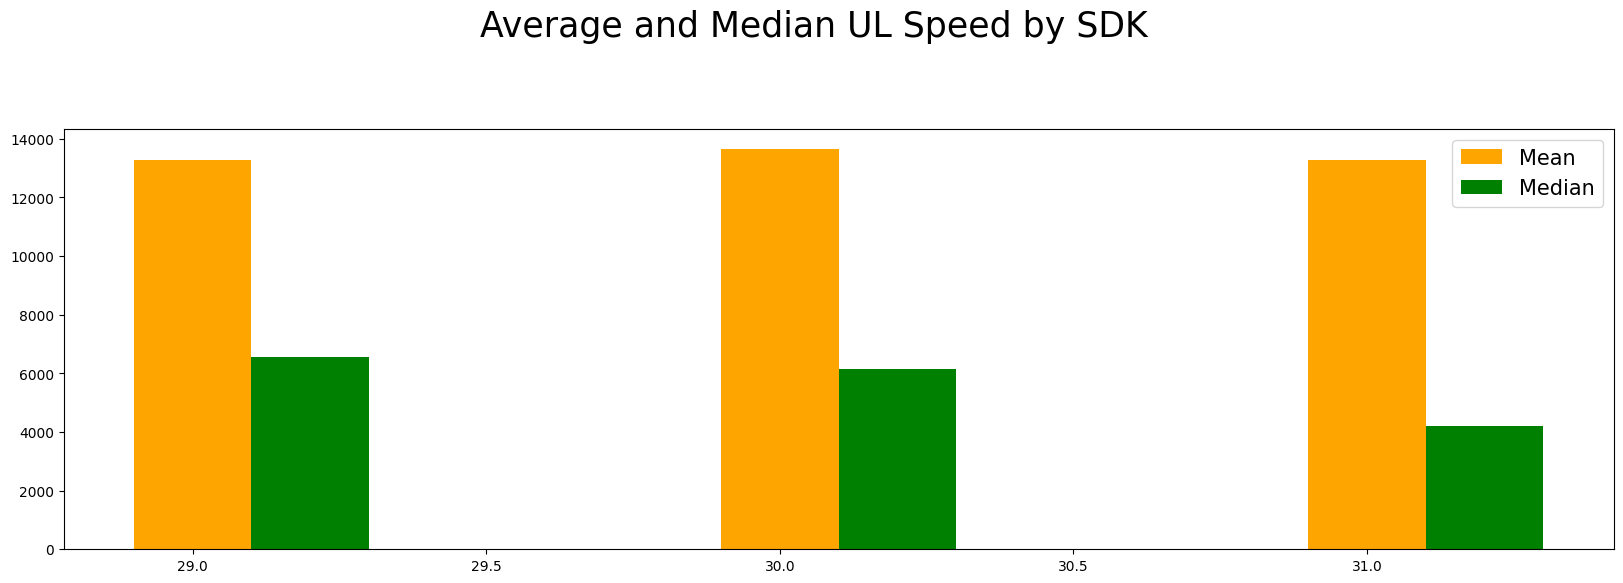

In [ ]:
#best performing SDK?

meanSpeed = d.groupby("android_sdk")["sp_ul_speed"].mean()
medianSpeed = d.groupby("android_sdk")["sp_ul_speed"].median()

meanSpeed.index.sort_values(ascending = False)
medianSpeed.index.sort_values(ascending = False)

plt.figure(figsize = (20, 12))
plt.suptitle("Average and Median UL Speed by SDK", fontsize = 25)

plt.subplot(2,1,1)
plt.bar(meanSpeed.index, meanSpeed, width = 0.2, color = "orange")
plt.bar(medianSpeed.index+0.2, medianSpeed, width = 0.2, color = "green")
plt.legend(["Mean", "Median"], fontsize = 15)


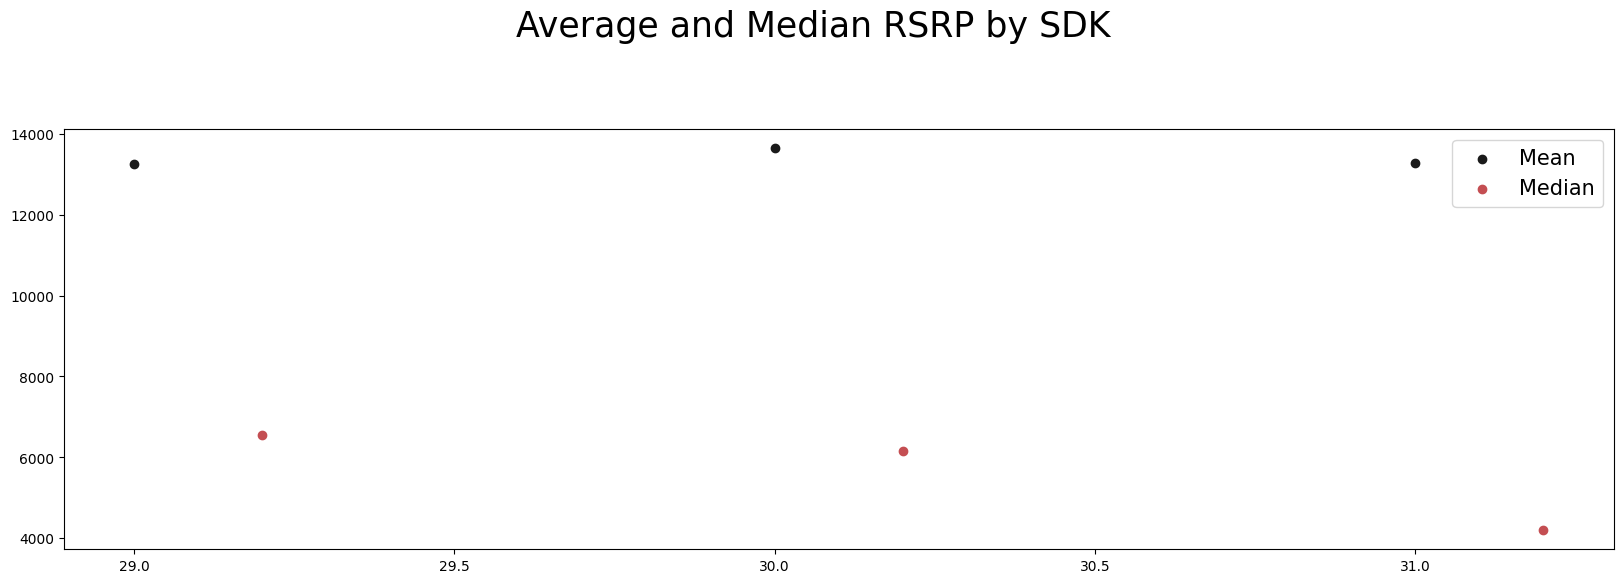

In [ ]:
meanRSRP = d.groupby("android_sdk")["lte_rsrp"].mean()
medianRSRP = d.groupby("android_sdk")["lte_rsrp"].median()

meanRSRP.index.sort_values(ascending = False)
medianRSRP.index.sort_values(ascending = False)

plt.figure(figsize = (20, 12))
plt.suptitle("Average and Median RSRP by SDK", fontsize = 25)

plt.subplot(2,1,1)
plt.scatter(meanSpeed.index, meanSpeed,color = "k")
plt.scatter(medianSpeed.index+0.2, medianSpeed, color = "r")
plt.plot()
plt.legend(["Mean", "Median"], fontsize = 15)


In [ ]:
#difffrences in mean rsrps when phone is roaming vs not
L1= d[d.is_network_roaming==0].groupby('phone_type')['lte_rsrp'].mean()
L2= d[d.is_network_roaming==1].groupby('phone_type')['lte_rsrp'].mean()
L1-L2

phone_type
CDMA   -2.461072
GSM     0.401205
Name: lte_rsrp, dtype: float64

In [ ]:
#difffrences in mean DL speed when phone is roaming vs not
L1= d[d.is_network_roaming==0].groupby('phone_type')['sp_dl_speed'].mean()
L2= d[d.is_network_roaming==1].groupby('phone_type')['sp_dl_speed'].mean()
L1-L2

phone_type
CDMA   -20420.407362
GSM     17751.833338
Name: sp_dl_speed, dtype: float64

In [ ]:
#difffrences in mean UL speed when phone is roaming vs not
L1= d[d.is_network_roaming==0].groupby('phone_type')['sp_ul_speed'].mean()
L2= d[d.is_network_roaming==1].groupby('phone_type')['sp_ul_speed'].mean()
L1-L2

phone_type
CDMA    -730.466344
GSM     7267.409129
Name: sp_ul_speed, dtype: float64

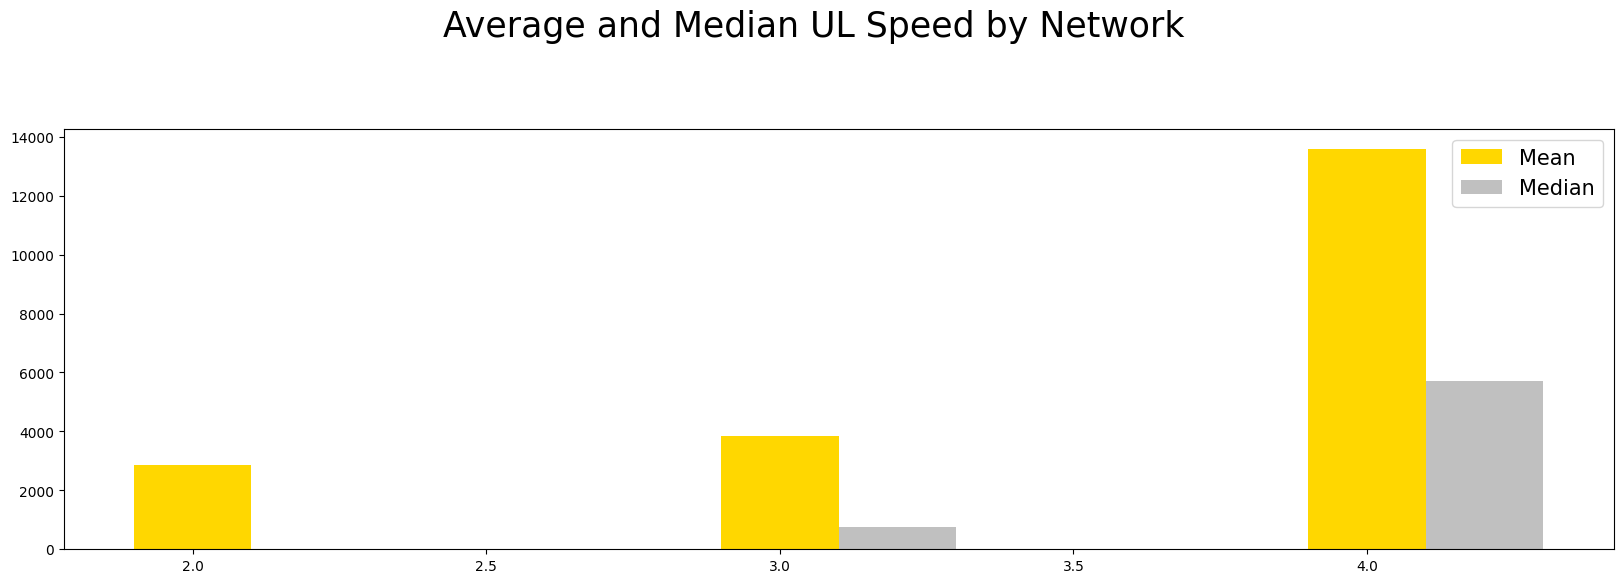

In [ ]:
#best performing network?

meanSpeed = d.groupby("network_generation")["sp_ul_speed"].mean()
medianSpeed = d.groupby("network_generation")["sp_ul_speed"].median()

meanSpeed.index.sort_values(ascending = False)
medianSpeed.index.sort_values(ascending = False)

plt.figure(figsize = (20, 12))
plt.suptitle("Average and Median UL Speed by Network", fontsize = 25)

plt.subplot(2,1,1)
plt.bar(meanSpeed.index, meanSpeed, width = 0.2, color = "gold")
plt.bar(medianSpeed.index+0.2, medianSpeed, width = 0.2, color = "silver")
plt.legend(["Mean", "Median"], fontsize = 15)


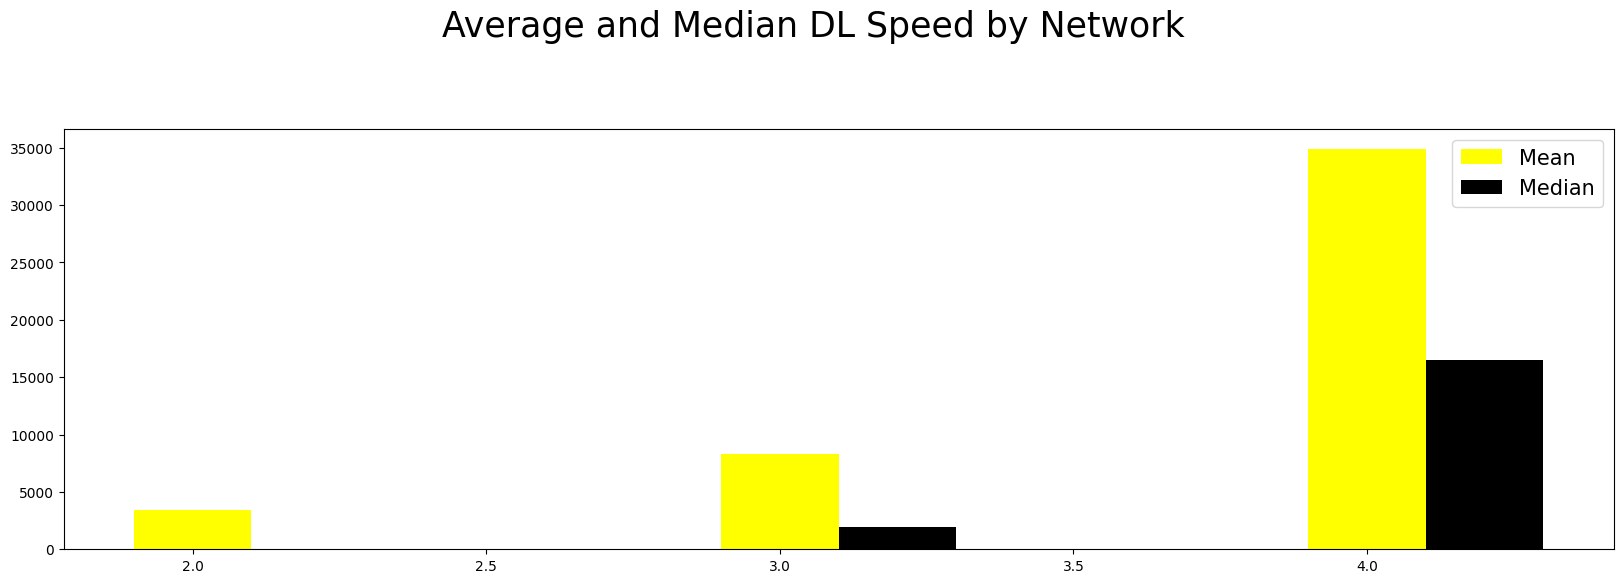

In [ ]:
#best performing network?

meanSpeed = d.groupby("network_generation")["sp_dl_speed"].mean()
medianSpeed = d.groupby("network_generation")["sp_dl_speed"].median()

meanSpeed.index.sort_values(ascending = False)
medianSpeed.index.sort_values(ascending = False)

plt.figure(figsize = (20, 12))
plt.suptitle("Average and Median DL Speed by Network", fontsize = 25)

plt.subplot(2,1,1)
plt.bar(meanSpeed.index, meanSpeed, width = 0.2, color = "yellow")
plt.bar(medianSpeed.index+0.2, medianSpeed, width = 0.2, color = "black")
plt.legend(["Mean", "Median"], fontsize = 15)

Network 2 ?

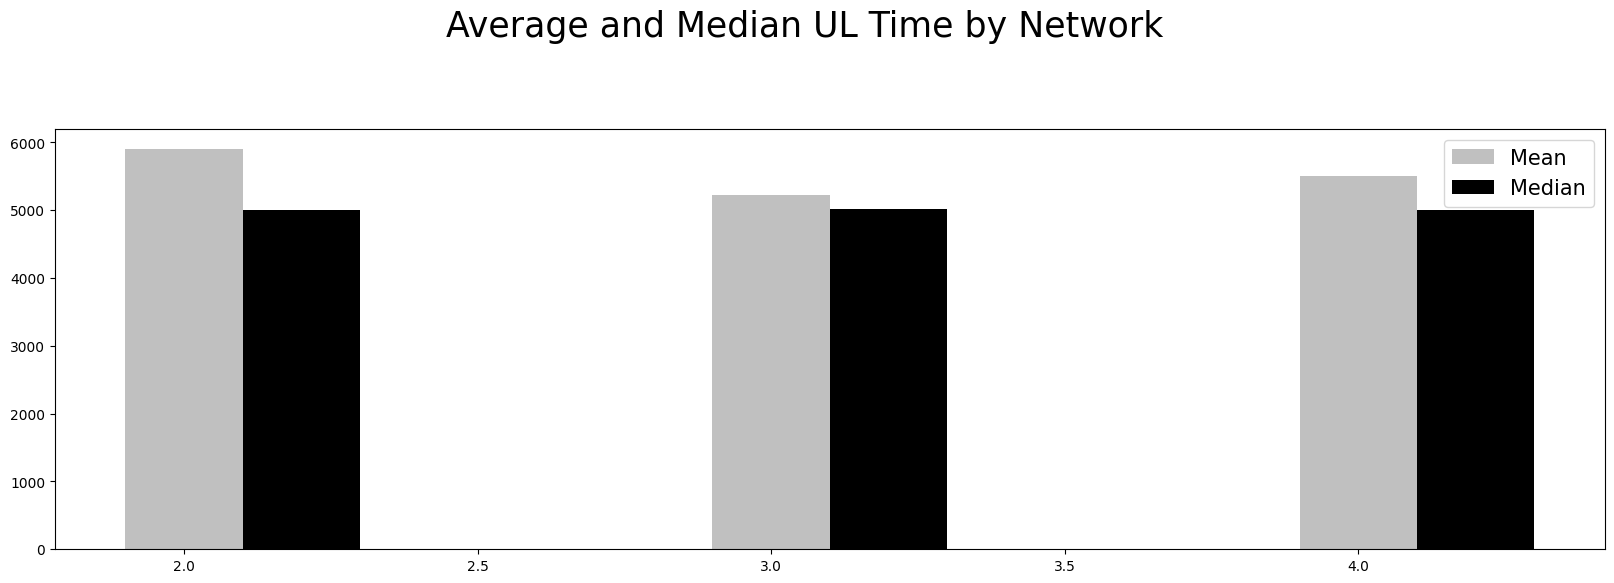

In [ ]:
#best performing network?

meanSpeed = d.groupby("network_generation")["sp_ul_time"].mean()
medianSpeed = d.groupby("network_generation")["sp_ul_time"].median()

meanSpeed.index.sort_values(ascending = False)
medianSpeed.index.sort_values(ascending = False)

plt.figure(figsize = (20, 12))
plt.suptitle("Average and Median UL Time by Network", fontsize = 25)

plt.subplot(2,1,1)
plt.bar(meanSpeed.index, meanSpeed, width = 0.2, color = "silver")
plt.bar(medianSpeed.index+0.2, medianSpeed, width = 0.2, color = "black")
plt.legend(["Mean", "Median"], fontsize = 15)


Network 2?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



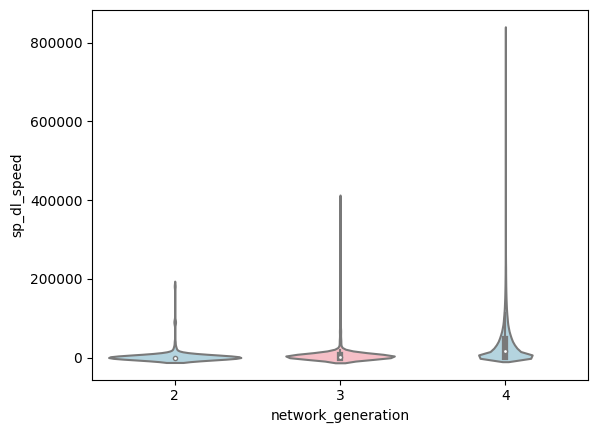

In [ ]:
sns.violinplot("network_generation", "sp_dl_speed", data=d,
               palette=["lightblue", "lightpink"]);

In [ ]:
#difffrences
b1= d.groupby('network_generation')['sp_dl_speed'].mean()
b2= d.groupby('network_generation')['sp_dl_speed'].median()
b1-b2

network_generation
2     3448.455090
3     6333.647000
4    18409.063291
Name: sp_dl_speed, dtype: float64

In [ ]:
#difffrences
c1= d.groupby('network_generation')['sp_ul_speed'].mean()
c2= d.groupby('network_generation')['sp_ul_speed'].median()
c1-c2

network_generation
2    2874.502994
3    3091.691000
4    7867.730033
Name: sp_ul_speed, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



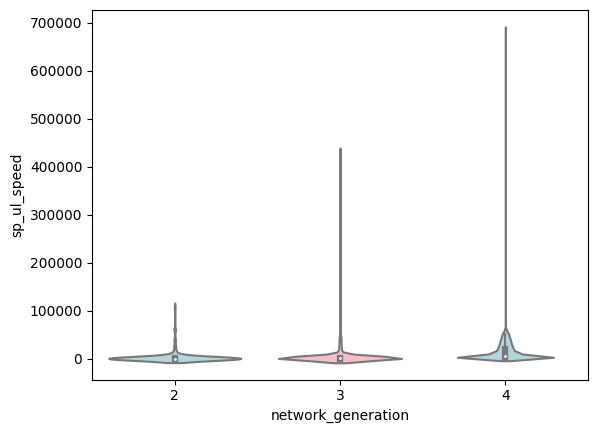

In [ ]:
sns.violinplot("network_generation", "sp_ul_speed", data=d,
               palette=["lightblue", "lightpink"]);

In [ ]:
#difffrences
d1= d.groupby('network_generation')['sp_ul_time'].mean()
d2= d.groupby('network_generation')['sp_ul_time'].median()
d1-d2

network_generation
2    888.137725
3    208.409000
4    498.655859
Name: sp_ul_time, dtype: float64

In [ ]:
#difffrences 
r1= d.groupby('network_generation')['sp_ul_time'].mean()
r2= d.groupby('network_generation')['sp_ul_speed'].median()
r1-r2


network_generation
2    5896.137725
3    4471.409000
4    -196.344141
dtype: float64

In [ ]:
#difffrences 
t1= d.groupby('network_generation')['sp_ul_time'].mean()
t2= d.groupby('network_generation')['sp_ul_size'].median()
t1-t2


network_generation
2    4.510138e+03
3   -4.671571e+05
4   -3.607838e+06
dtype: float64

In [ ]:
#difffrences 
m1= d.groupby('network_generation')['sp_ul_time'].mean()
m2= d.groupby('network_generation')['sp_dl_speed'].median()
m1-m2


network_generation
2     5898.137725
3     3269.909000
4   -10944.844141
dtype: float64

In [ ]:
#other = ['network_connection_type', 'is_network_roaming', 'android_vrs', 'android_sdk']

#fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 15), sharey=True)
#t = 0

#for i in range(4):
    #for j in range(2):
        #data_prep = [d[obj].value_counts()  for obj in other]
        #axes = ax[i][j]

        #sns.barplot(x=data_prep[t].index, y=data_prep[t].values, ax=axes, alpha=0.8)
        #axes.set_title(other[t], fontsize=16)
        #axes.set_yticks(list(range(0, 3001, 500)))
        #if j == 0:
            #axes.set_ylabel('Number of clients', fontsize=12)
        #t += 1

#fig.suptitle('Customers who use additional services', y=0.93, fontsize=20)
#plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



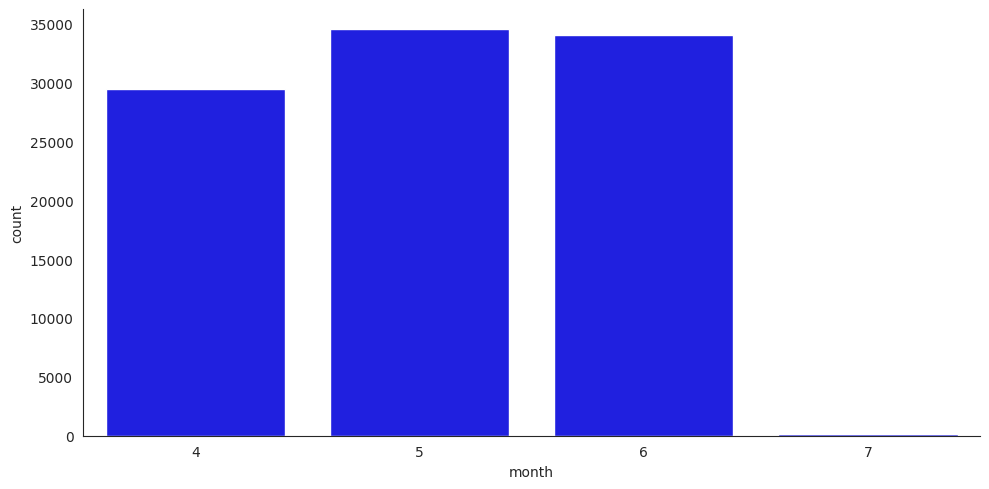

In [ ]:
#most active month? 
with sns.axes_style('white'):
  g = sns.factorplot("month", data = d, aspect=2,
                     kind="count", color='blue')

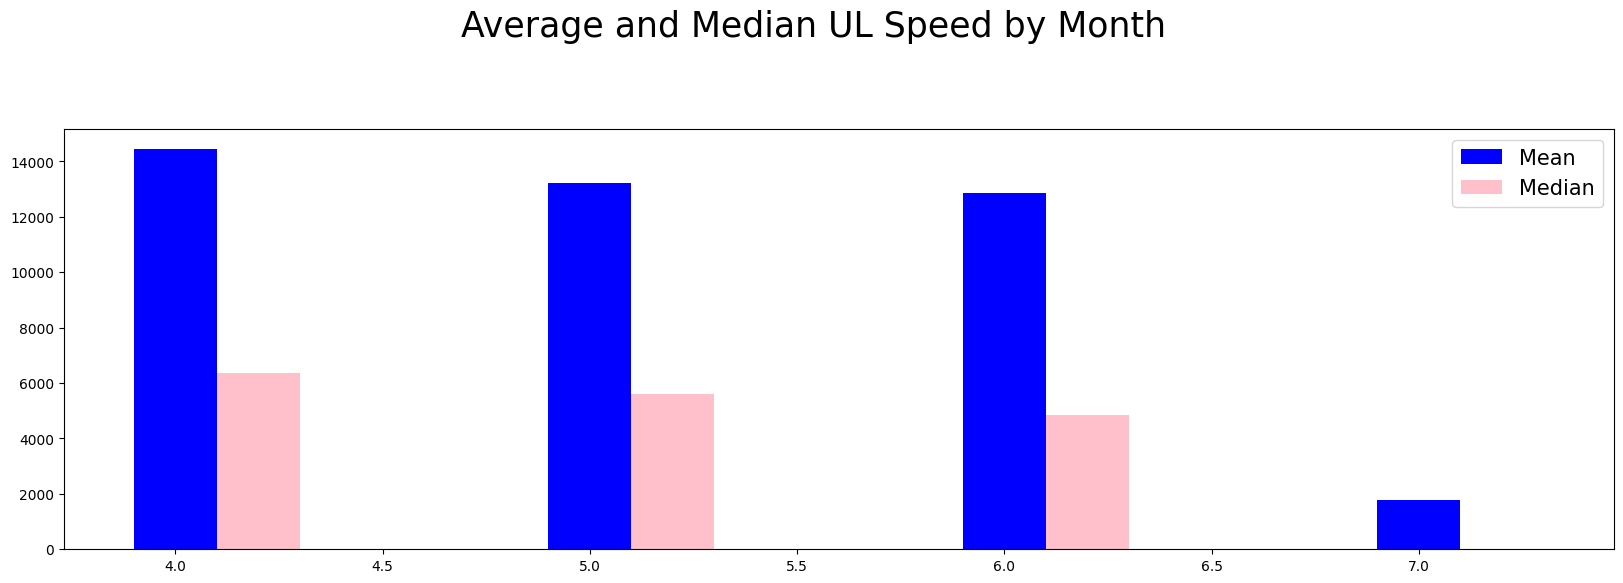

In [ ]:
#best performing network?

meanSpeed = d.groupby("month")["sp_ul_speed"].mean()
medianSpeed = d.groupby("month")["sp_ul_speed"].median()

meanSpeed.index.sort_values(ascending = False)
medianSpeed.index.sort_values(ascending = False)

plt.figure(figsize = (20, 12))
plt.suptitle("Average and Median UL Speed by Month", fontsize = 25)

plt.subplot(2,1,1)
plt.bar(meanSpeed.index, meanSpeed, width = 0.2, color = "blue")
plt.bar(medianSpeed.index+0.2, medianSpeed, width = 0.2, color = "pink")
plt.legend(["Mean", "Median"], fontsize = 15)

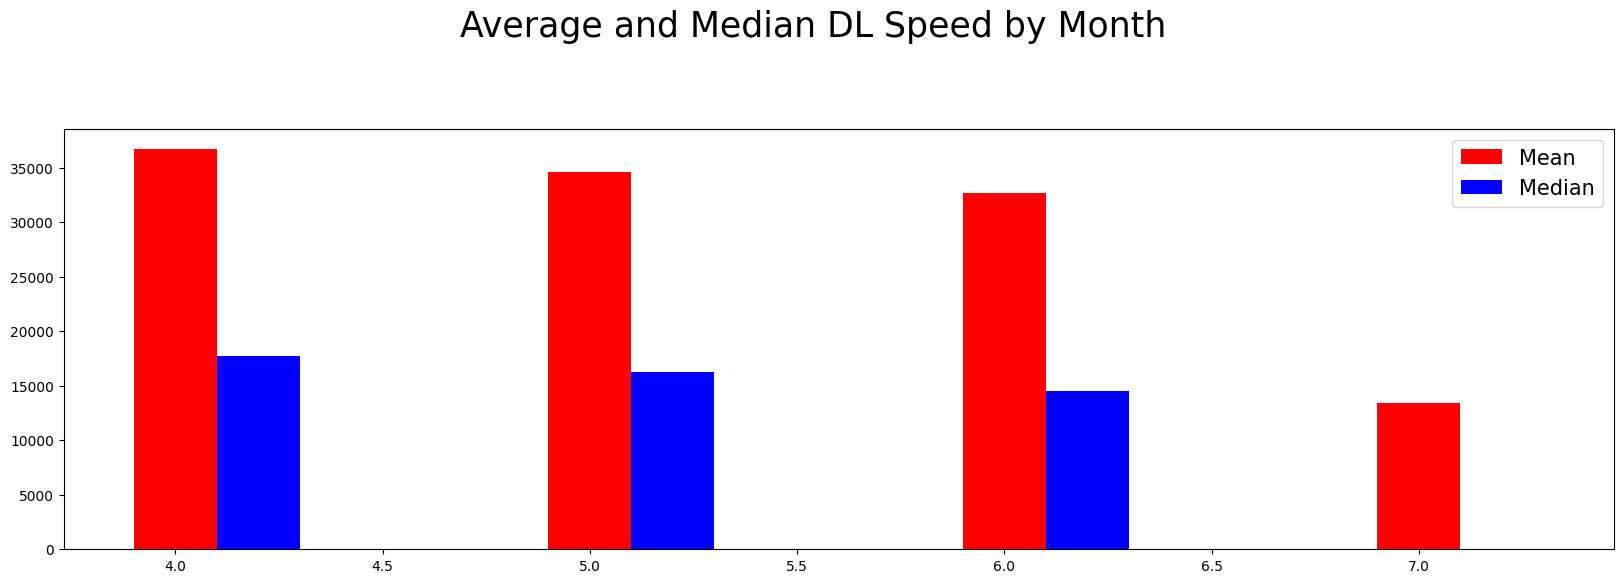

In [ ]:
#best performing network?

meanSpeed = d.groupby("month")["sp_dl_speed"].mean()
medianSpeed = d.groupby("month")["sp_dl_speed"].median()

meanSpeed.index.sort_values(ascending = False)
medianSpeed.index.sort_values(ascending = False)

plt.figure(figsize = (20, 12))
plt.suptitle("Average and Median DL Speed by Month", fontsize = 25)

plt.subplot(2,1,1)
plt.bar(meanSpeed.index, meanSpeed, width = 0.2, color = "red")
plt.bar(medianSpeed.index+0.2, medianSpeed, width = 0.2, color = "blue")
plt.legend(["Mean", "Median"], fontsize = 15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



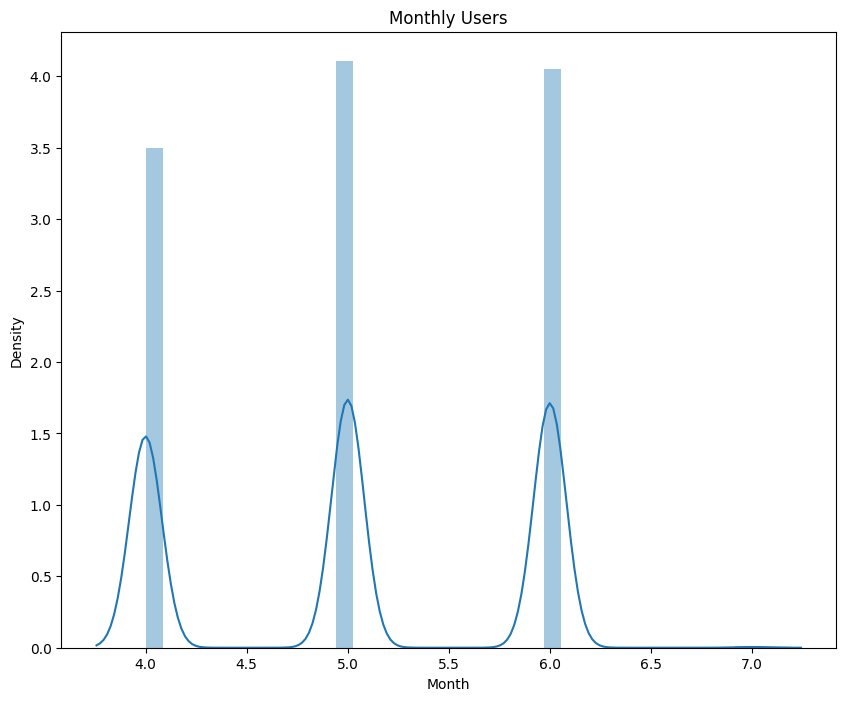

In [ ]:
sizes=d['month']
plt.figure(figsize=(10,8))
sns.distplot(sizes)
plt.title('Monthly Users')
plt.xlabel('Month')
plt.show()

Month 7? 

# **Predicitve Modeling**

Undersampling the majority class

Combine the two classes into a single (resampled) train dataset

In [ ]:
#Import necessary packages
import numpy as np 
import pandas as pd 
from scipy.stats import iqr as sc

#visualizing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

#metrics and split
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#model imports
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression

In [ ]:
# Print out all unique values for each variable
for col in d.columns:
    print(col, ":", d[col].unique())

inserted_at : ['2022-06-28 16:00:00' '2022-05-05 17:00:00' '2022-06-01 21:00:00' ...
 '2022-05-13 20:00:00' '2022-06-17 03:00:00' '2022-04-15 10:00:00']
model : ['SM-A025U' 'SM-A015T1' 'SM-S908U' 'SM-G998U' 'SM-G970U' 'moto g pure'
 'SM-A125U' 'SM-A025U1' 'SM-G975U' 'Wiko U614AS' 'LM-Q730' 'SM-G981U'
 'LM-K500' 'moto g stylus 5G' 'SM-G986U' 'SM-G960U' 'SM-A326U' 'SM-A115U'
 'moto g play (2021)' 'SM-A536U' 'SM-G991U' 'SM-A515F' 'LM-V600'
 'SM-N975U1' 'SM-N986U' 'Nokia X100' 'SM-F711U' 'SM-G975U1' 'SM-G973U'
 'SM-A136U' 'SM-A325M' 'SM-A022M' 'Pixel 2' 'SM-G991U1' 'SM-G781U1'
 'LM-G900TM' 'motorola one 5G ace' 'WTCELERO5G' 'SM-A032M' 'SM-G998U1'
 'SM-G986U1' 'motorola edge 5G UW (2021)' 'SM-G996U' 'SM-A515U1'
 'SM-S901U' 'SM-N975U' 'SM-A716U1' 'SM-A115M' 'SM-G970U1' 'SM-N976U'
 'SM-A515U' 'SM-G990U1' 'SM-A326U1' 'SM-G981V' 'SM-S901U1' 'SM-G975F'
 'SM-S906U' 'CP3669AS' 'SM-G977U' 'SM-A715F' 'SM-A127M' 'SM-S908U1'
 'SM-A536U1' 'SM-S205DL' '5087Z' 'GM1915' 'SM-G973U1' 'Pixel 4 XL'
 'CP3706AS

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98071 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   inserted_at              98071 non-null  object 
 1   model                    98071 non-null  object 
 2   manufacturer             98071 non-null  object 
 3   phone_type               98071 non-null  object 
 4   app_vrs_code             98071 non-null  int64  
 5   android_vrs              98071 non-null  int64  
 6   android_sdk              98071 non-null  int64  
 7   name                     98071 non-null  object 
 8   latitude                 98071 non-null  float64
 9   longitude                98071 non-null  float64
 10  screen_on                98071 non-null  bool   
 11  lte_rsrp                 98071 non-null  float64
 12  lte_rsrq                 98071 non-null  float64
 13  lte_rssnr                98071 non-null  float64
 14  network_generation    

Best Models for Prediciting Upload Speed

In [ ]:
#Defining X and Y for model, Train-test split
X = encodeddata[['android_vrs', 'app_vrs_code','android_sdk','latitude','longitude','lte_rsrp','lte_rsrq','lte_rssnr','network_generation','network_type_int','sp_dl_speed','sp_dl_size','sp_ul_size','sp_ul_time']]
y = encodeddata['sp_ul_speed']
#Getting Test and Training Set, change test_size to change the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)
X_train.shape, y_train.shape

((58842, 14), (58842,))

In [ ]:
## Linear Regression Algorithm 
reg = linear_model.LinearRegression()  
# train the model using the training sets
reg.fit(X_train, y_train)

#Some LinReg Model
y_pred=reg.predict(X_test)
r2_score(y_test,y_pred)


0.9968090557758497

In [ ]:
#predictions
y_pred

array([10054.19595566,   267.2648463 ,  6984.80998359, ...,
        7424.85328666,  7847.89561583,    12.20125711])

In [ ]:
#OLS REGRESSION
#https://www.statsmodels.org/devel/examples/notebooks/generated/ols.html

#Add constant because stat model need constant
X_train_addconst = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_addconst)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            sp_ul_speed   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.064e+06
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:19:11   Log-Likelihood:            -5.1157e+05
No. Observations:               58842   AIC:                         1.023e+06
Df Residuals:                   58828   BIC:                         1.023e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.0933     14

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
## Decision Tree Algorithm 
decision_model = DecisionTreeRegressor()  
decision_model.fit(X_train, y_train) 
y_predict = decision_model.predict(X_test)
r2_score(y_test,y_predict)

0.9968898754374333

In [ ]:
#predictions
y_predict

array([10104.,   255.,  7017., ...,  7493.,  7854.,     0.])

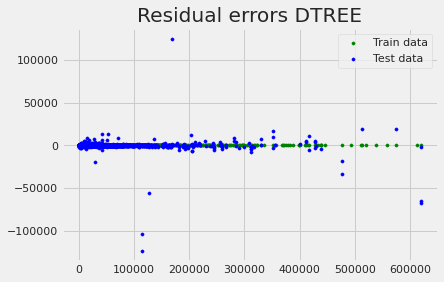

In [ ]:
# plot for residual error
  
plt.style.use('fivethirtyeight')
  
## plotting residual errors in train-test data
plt.scatter(decision_model.predict(X_train), decision_model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
plt.scatter(decision_model.predict(X_test), decision_model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
plt.title("Residual errors DTREE")
plt.show()

In [ ]:
## Random Forest
rf=RandomForestRegressor(n_estimators=200, max_depth=10)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
r2_score(y_test,y_pred)

0.9976954671125028

In [ ]:
## Extra Tree Regression
ETree=ExtraTreesRegressor(n_estimators = 200)
ETree.fit(X_train,y_train)
y_predict=ETree.predict(X_test)
r2_score(y_test,y_predict)

0.9982846929718674

In [ ]:
##Gradient Boosting Regression
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_predict=gbr.predict(X_test)
r2_score(y_test,y_predict)

In [ ]:
y_predict

In [ ]:
## XGBoost

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.25, max_depth = 15, n_estimators = 100)
xgb.fit(X_train, y_train)
y_predict=xgb.predict(X_test)
r2_score(y_test,y_predict)

[22:21:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.998894623929158

In [ ]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Gradient Boost', 'Random Forest', 'Extra Tree Regressor', 'XgBoost'],
    'Score' : [reg.score(X_test, y_test), decision_model.score(X_test, y_test), gbr.score(X_test, y_test), rf.score(X_test, y_test), 
               ETree.score(X_test, y_test), xgb.score(X_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
5               XgBoost  0.998895
2        Gradient Boost  0.998844
4  Extra Tree Regressor  0.998285
3         Random Forest  0.997695
1         Decision Tree  0.996890
0     Linear Regression  0.996809

Best Models for Predicting Download Speed

In [ ]:
#Defining X and Y for model, Train-test split
X = encodeddata[['android_vrs', 'app_vrs_code','android_sdk','latitude','longitude','lte_rsrp','lte_rsrq','lte_rssnr','network_generation','network_type_int','sp_ul_speed','sp_dl_size','sp_ul_size','sp_ul_time']]
y = encodeddata['sp_dl_speed']
#Getting Test and Training Set, change test_size to change the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)
X_train.shape, y_train.shape

((58842, 14), (58842,))

In [ ]:
## Linear Regression Algorithm 
reg = linear_model.LinearRegression()  
# train the model using the training sets
reg.fit(X_train, y_train)

#Some LinReg Model
lr_pred=reg.predict(X_test)
r2_score(y_test,y_pred)

0.11722400589891047

In [ ]:
lr_pred

array([10861.02171261,  5311.2549788 ,  1379.54513252, ...,
       11744.05290463, 32858.35751694,    98.3837804 ])

In [ ]:
## Decision Tree Algorithm 
decision_model = DecisionTreeRegressor()  
decision_model.fit(X_train, y_train) 
dt_pred = decision_model.predict(X_test)
r2_score(y_test,y_predict)

0.11708929753468944

In [ ]:
dt_pred

array([10757.,  5252.,  1282., ..., 11678., 33008.,     0.])

In [ ]:
## XGBoost
xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.25, max_depth = 15, n_estimators = 100)
xgb.fit(X_train, y_train)
xgb_pred=xgb.predict(X_test)
r2_score(y_test,y_predict)

[22:21:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.11708929753468944

In [ ]:
xgb_pred

array([ 1.0798633e+04,  5.2852739e+03,  1.2851245e+03, ...,
        1.1670091e+04,  3.3012449e+04, -1.1600400e+00], dtype=float32)

Linear Regression R-squared Score        : 0.9947924995774032
Decision Tree Regressor R-squared Score  : 0.9919005682686811
Random Forest Regressor R-squared Score  : 0.9967209751099304


Text(0.5, 1.0, 'Scores')

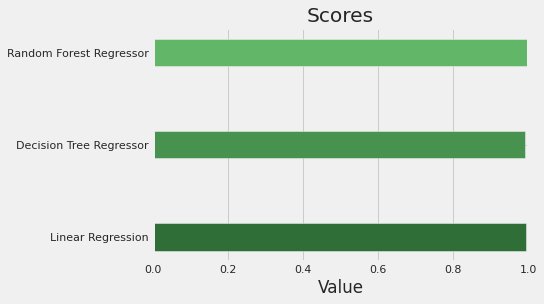

In [ ]:
r2_0 = r2_score(y_test, lr_pred)
print("Linear Regression R-squared Score        : {}".format(r2_0))

r2_1 = r2_score(y_test, dt_pred)
print("Decision Tree Regressor R-squared Score  : {}".format(r2_1))

r2_2 = r2_score(y_test, xgb_pred)
print("Random Forest Regressor R-squared Score  : {}".format(r2_2))

plt.barh(["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor"], [r2_0, r2_1, r2_2],
        height = 0.3, color = ["#306E38", "#47924F", "#61B668"])
plt.xlim(0, 1)
plt.xlabel("Value")
plt.title("Scores")

Neutral Network

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
X = d.drop(["inserted_at", "model","manufacturer","phone_type","name","network_country","network_name_mapped"],axis=1)
y = d["sp_dl_speed"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
knn_model = KNeighborsRegressor(n_neighbors=2)
knn_model.fit(X_train, y_train)
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print('Root Mean Squared Error (Train set):',rmse)

Root Mean Squared Error (Train set): 2408.4379148845005


In [ ]:
knn_model.score(X_train,y_train)

0.9979137667232522

In [ ]:
train_preds

array([17252.5, 13516. , 37609.5, ..., 14932.5,     0. , 26301.5])

Balancing Data/Sampling using binary variable "is_network_roaming" and predictions 

In [ ]:
# separate the classes, where we already know 'is_network_roaming==0' is the majority class
d_0 = d[df.is_network_roaming==0]
d_1 = d[df.is_network_roaming==1]

# remember the sizes of the two classes
n_majority_class = d_0.shape[0]
n_minority_class = d_1.shape[0]
print(f"The majority class contains {n_majority_class} records. \nThe minority class contains {n_minority_class} records. ")

The majority class contains 97550 records. 
The minority class contains 521 records. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
from sklearn.utils import resample
# undersample the majority class
d_0_undersampled = resample(d_0, replace=False,
                              n_samples=n_minority_class, random_state=1234)
d_0_undersampled.shape

(521, 26)

In [ ]:
d_balanced = pd.concat([d_0_undersampled, d_1])
d_balanced.is_network_roaming.value_counts()

0    521
1    521
Name: is_network_roaming, dtype: int64

In [ ]:
d_balanced= d_balanced.drop(["inserted_at", "model","manufacturer","phone_type","name","network_country","network_name_mapped"],axis=1)
d_balanced

app_vrs_code  android_vrs  android_sdk   latitude  longitude  \
55489           536           10           29  40.718853 -73.978527   
73943       2015010           12           31  40.514236 -74.271919   
56114         16990           11           30  40.904800 -73.853178   
31050         16921           12           31  41.181419 -73.239839   
80825       7034020           12           31  41.188683 -73.430266   
...             ...          ...          ...        ...        ...   
99416         16972           11           30  40.814922 -73.931757   
99508       7032020           11           30  40.826045 -73.878609   
99645           630           12           31  40.762103 -73.980797   
99656         17000           11           30  40.862600 -73.829815   
99759           565           12           31  40.771773 -73.985717   

       screen_on   lte_rsrp       lte_rsrq  lte_rssnr  network_generation  \
55489       True  -86.00000     -13.000000    1.20718                   4   
73943       True  -99.00000      -7.000000    1.20718                   4   
56114       True  -87.00000     -15.000000    0.00000                   4   
31050       True  -96.63248  238242.620188    1.20718                   4   
80825       True -116.00000     -12.000000    1.20718                   4   
...          ...        ...            ...        ...                 ...   
99416       True -140.00000     -20.000000    1.20718                   4   
99508       True  -96.63248  238242.620188    1.20718                   4   
99645       True  -96.63248  238242.620188    1.20718                   4   
99656       True  -96.63248  238242.620188    1.20718                   4   
99759       True  -96.63248  238242.620188    1.20718                   3   

       network_type_int  is_network_roaming  network_connection_type  \
55489                13                   0                        0   
73943                13                   0                        1   
56114                13                   0                        0   
31050                13                   0                        0   
80825                13                   0                        0   
...                 ...                 ...                      ...   
99416                13                   1                        0   
99508                13                   1                        0   
99645                13                   1                        0   
99656                13                   1                        0   
99759                15                   1                        0   

       sp_dl_speed   sp_dl_size  sp_ul_speed  sp_ul_size  sp_ul_time  month  
55489      45359.0   28615690.0      33969.0  21481456.0      5059.0      5  
73943     366569.0  229288967.0      45096.0  28235526.0      5009.0      5  
56114       4211.0    2657418.0      29259.0  18367487.0      5022.0      6  
31050          0.0          0.0          0.0         0.0      5006.0      4  
80825       1001.0    1251348.0        167.0    208747.0     10008.0      4  
...            ...          ...          ...         ...         ...    ...  
99416          0.0          0.0          0.0         0.0      5003.0      6  
99508       8315.0    5211160.0       2713.0   1709405.0      5041.0      6  
99645      12875.0    8051448.0        733.0    458629.0      5004.0      6  
99656      26369.0   16539788.0      44612.0  28049855.0      5030.0      6  
99759         51.0      32003.0        148.0     92639.0      5007.0      4  

[1042 rows x 19 columns]

***Balanced Data***

In [ ]:
# load necessary Python packages
import numpy as np
import pandas as pd
pd.set_option('max_columns', 100)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Separate the feature matrix and target array. Then, split train and test
X = d_balanced.drop(columns=['is_network_roaming'])
y = d_balanced['is_network_roaming']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                               test_size=0.2, # reserve 20% data for testing
                               stratify=y, # use stratified sampling
                               random_state=1)

In [ ]:
#Random Forrest 

from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(random_state=1)
model_RF.fit(X_train,y_train)

y_predict = model_RF.predict(X_test)

accuracy = accuracy_score(y_test, y_predict).round(4)
print(f"The accuracy is: {(accuracy*100).round(4)}%")
print("The confusion matrix is:")
cm = confusion_matrix(y_test, y_predict)
print(cm)

# save the results for later comparison
accuracy_RF = accuracy
cm_RF = cm

The accuracy is: 71.77%
The confusion matrix is:
[[75 29]
 [30 75]]


In [ ]:
#record-by-record binary predictions and record-by-record probability estimates 

Accuracy decreased: Undersampling the majority class looks to create bias 

In [ ]:
#RF: 

y_predict = model_RF.predict(X_test)
y_predict_proba = model_RF.predict_proba(X_test)

record_level_predictions = pd.DataFrame({'y_test':y_test.to_numpy(),
                                         'y_predict':y_predict,
                                         'y_predict_proba':y_predict_proba[:,1]})
record_level_predictions

y_test  y_predict  y_predict_proba
0         1          1             0.59
1         1          0             0.31
2         0          1             0.55
3         1          0             0.49
4         0          1             0.66
..      ...        ...              ...
204       0          1             0.57
205       0          0             0.28
206       0          0             0.49
207       0          1             0.68
208       0          1             0.61

[209 rows x 3 columns]

roc_auc_score

"roc" stands for the Receiver Operating Characteristic (ROC) Curve "auc" stands for "Area Under the ROC Curve"

roc_auc_score(y_test, y_predict_proba) computes the size of the area under the ROC curve. Value between 0.5 and 1. A larger number means better model performance.

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predict_proba[:,1])

0.7707417582417583

In [ ]:
#RandomForestClassifier tells the relative importance of all input variables:
importances = model_RF.feature_importances_
pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

longitude                  0.133630
latitude                   0.117267
sp_dl_size                 0.099195
sp_dl_speed                0.094846
sp_ul_size                 0.092033
sp_ul_time                 0.088713
sp_ul_speed                0.085237
app_vrs_code               0.080127
lte_rsrp                   0.050158
lte_rsrq                   0.049551
month                      0.028205
android_sdk                0.022674
android_vrs                0.021803
network_generation         0.015563
network_type_int           0.009533
lte_rssnr                  0.007895
screen_on                  0.001961
network_connection_type    0.001609
dtype: float64

longtitude/latitude/sp_dl_size 

# **Mapping**

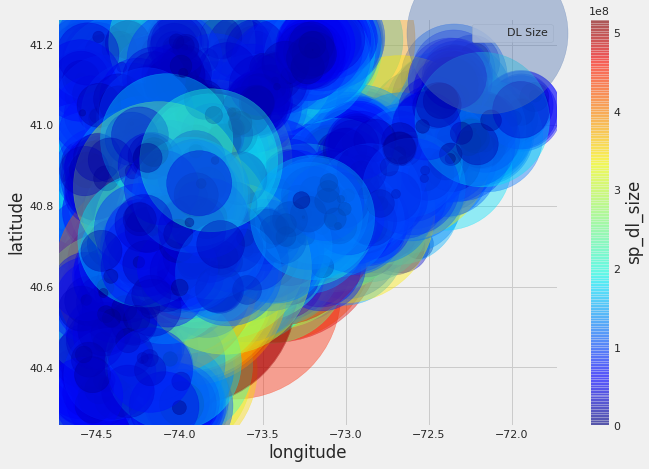

In [ ]:
#mapping top 3 relative importance
d.plot(kind="scatter", x="longitude", y="latitude",
    s=d['sp_dl_size']/10000, label="DL Size",
    c="sp_dl_size", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.5 MB/s 
     |████████████████████████████████| 16.7 MB 300 kB/s 
     |████████████████████████████████| 6.3 MB 58.5 MB/s 


In [ ]:
import plotly.express as px
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates


geometry = [Point(xy) for xy in zip(d['longitude'], d['latitude'])]
gdf = GeoDataFrame(d, geometry=geometry)   


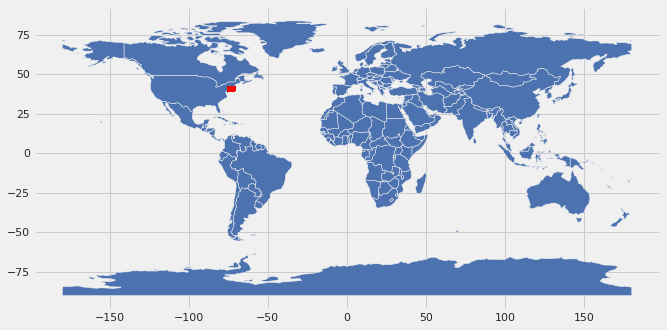

In [ ]:
#map 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

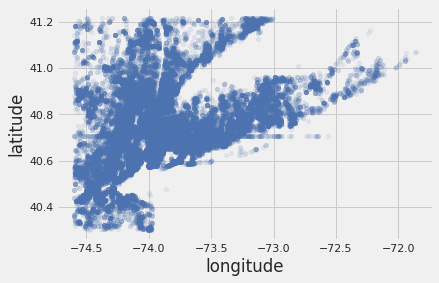

In [ ]:
d.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [ ]:
#interactive map
fig = px.scatter_geo(d,lat='latitude',lon='longitude', hover_name="is_network_roaming")
fig.update_layout(title = 'Significant Locations', title_x=1)
fig.show()

In [ ]:
#get coordinates by network
map= d[["longitude", "latitude", "network_generation"]]
map["coordinates"] = list(zip(map.longitude, map.latitude))
#first 20 locations
map= map[[  "coordinates" , "network_generation" ]]
map.iloc[0:19]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



coordinates  network_generation
0   (-74.1839308, 40.9206885)                   4
1   (-73.5339728, 40.7063939)                   4
2   (-73.9546239, 40.8243691)                   4
3   (-74.2239134, 40.3978628)                   4
4   (-73.8260524, 40.9842306)                   2
5   (-74.1357564, 40.8623922)                   4
6    (-73.9750994, 40.683429)                   4
7     (-74.1926013, 40.76233)                   4
8     (-73.95825, 40.6904012)                   4
9   (-74.3758377, 40.5303906)                   4
10  (-73.9453354, 40.7834519)                   4
11  (-73.6529834, 40.5854798)                   4
12   (-73.2472768, 40.782646)                   4
13  (-73.9939367, 40.7534505)                   4
14  (-73.3097122, 40.7473675)                   4
16  (-74.0626207, 40.7274016)                   4
17   (-74.163757, 40.5968212)                   4
19  (-73.2121792, 41.1885865)                   4
20   (-73.8913124, 40.675937)                   4

reverse engineering to find locations / closer look

In [ ]:
#location of 20th record

from geopy.geocoders import Nominatim
# Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")

# Latitude & Longitude input
Latitude = "-73.8913124"
Longitude = "40.675937"

location = geolocator.reverse(Latitude+","+Longitude)
location


Location(None, (0.0, 0.0, 0.0))

In [ ]:
#14th record 
geolocator.reverse("-73.3097122, 40.7473675")


Location(None, (0.0, 0.0, 0.0))

not addle to extract full address for state city and zip code per dataset

In [ ]:
#example
geolocator.reverse("36.7783, 119.4179")

Location(潍河西堤顶路, 都昌街道, 寒亭区, 潍坊市, 山东省, 261301, 中国, (36.77735816928162, 119.41531151458814, 0.0))